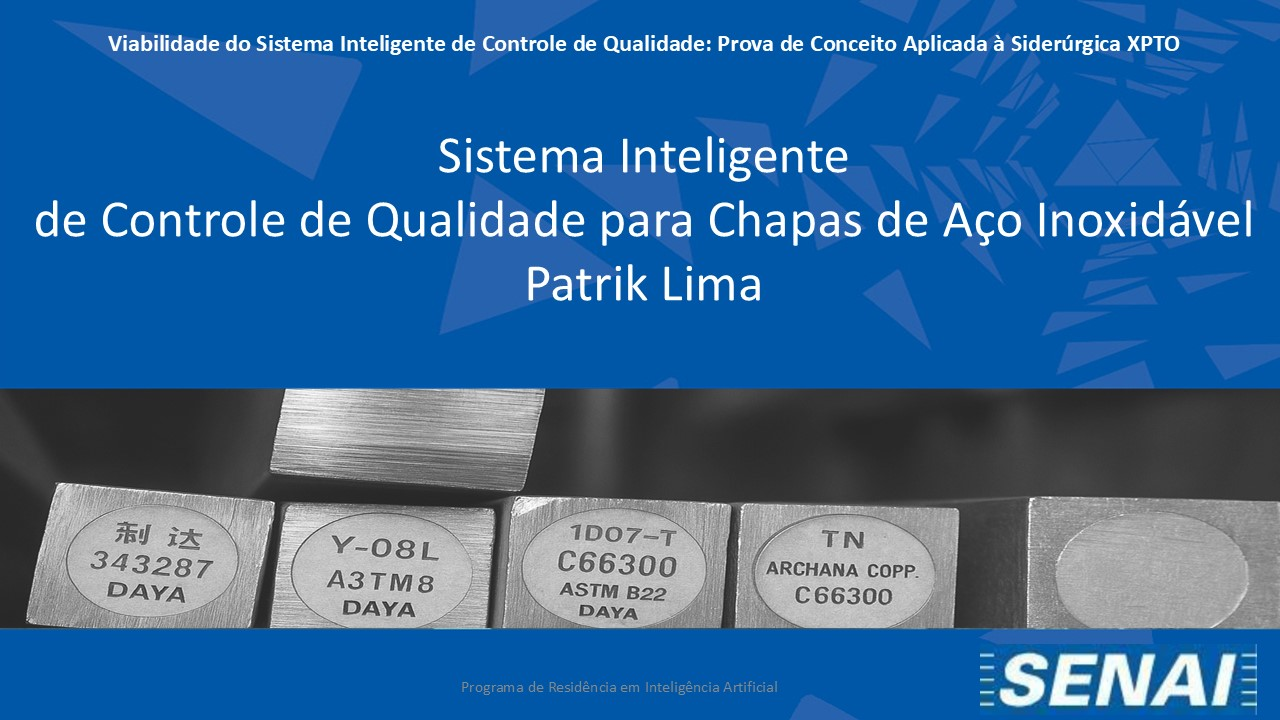

 ## <h1 align="center"><font color="#000080">Projeto Final do Bootcamp CDIA</font></h1>
  
  <h2><font color="#006400">Datas Importantes</font></h2>
  <ul>
    <li><font color="#ff4500"><b>Início:</b> 12/05/2025</font></li>
    <li><font color="#ff4500"><b>Apresentação para a Banca:</b> 15/05/2025 e 16/05/2025</font></li>
    <li><font color="#ff4500"><b>Tempo de Apresentação:</b> 10 minutos</font></li>
  </ul>
  
  <h2><font color="#006400">Contextualização</font></h2>

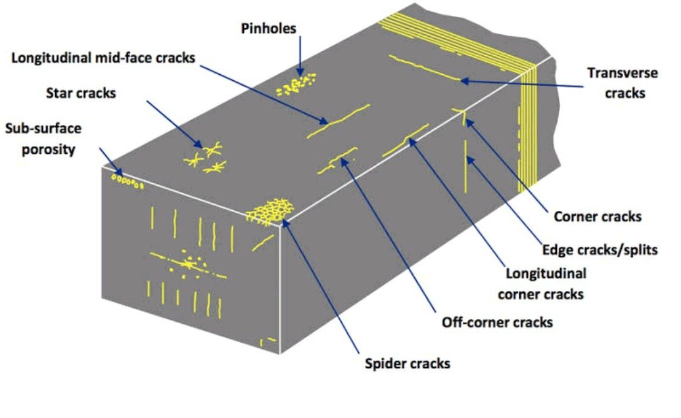

  <p><font color="#2f4f4f">Uma empresa do setor siderúrgico contratou você para desenvolver um <b><font color="#8b008b">sistema inteligente de controle de qualidade</font></b> para chapas de aço inoxidável, com foco na detecção e classificação automática de defeitos a partir de imagens de superfície.</font></p>
  
  <h2><font color="#006400">Conjunto de Dados</font></h2>
  <ul>
    <li><font color="#483d8b"><b>Composição:</b> 31 indicadores geométricos e estatísticos (área, perímetro, índices de orientação, luminosidade, proporção de bordas).</font></li>
    <li><font color="#483d8b"><b>Rótulos:</b> 7 classes de defeitos (6 categorias específicas + "outros defeitos").</font></li>
  </ul>
  
  <h2><font color="#006400">Objetivo do Sistema</font></h2>
  <p><font color="#2f4f4f">O sistema deve:</font></p>
  <ul>
    <li><font color="#b22222"><b>Prever</b> a classe do defeito a partir de uma nova imagem ou conjunto de medições.</font></li>
    <li><font color="#b22222">Retornar a <b>probabilidade associada</b> à previsão.</font></li>
    <li><font color="#b22222">Extrair <b>insights</b> sobre a operação e os defeitos.</font></li>
    <li><font color="#b22222">Gerar <b>visualizações de dados</b> para análise.</font></li>
  </ul>
  
  <h2><font color="#006400">Expectativas da Empresa</font></h2>
  <p><font color="#2f4f4f">Desenvolver um sistema eficiente para <b><font color="#8b008b">classificação automática de defeitos</font></b>, fornecendo informações acionáveis para melhorar o controle de qualidade no processo de produção de chapas de aço.</font></p>

# **Metodologia**

**A PoC foi construída de forma iterativa e incremental**, com foco na prototipagem, utilizando o Google Colab,Python, Scikit-learn e o Git para manter as versões e desenvolver os protótipos. **A cada mudança, validava-se o comportamento na base de dados fornecida.**

**A abordagem envolveu a integração de conhecimentos de machinle learning**, escrita e refatoração em Python, com **etapas distintas de pesquisa, escolhas, definição de funcionalidades básicas, configuraçoes diversas, programação e depuração.**

**Cada fase foi planejada e testada** para garantir que a PoC atendesse aos **requisitos básicos do documento “Projeto Final do Bootcamp CDIA.pdf”**. **Nessa toada, foram destacados e incorporados ao projeto os requisitos funcionais, não funcionais e de sistema necessários à PoC.**

# **Etapas de Desenvolvimento**

## **1-Carregamento dos Dados**

In [1]:
import os
import sys
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML, Image, Markdown
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from google.colab import widgets
from IPython.display import display
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
a1 = False # flag de teste coisas de gambi usadoi para muitas coisas
#Obtenção dos Dados
def finalisaOPrograma(msg):
    try:
        #imprime msg de rro para depuracao antes da finalizacao
        print(msg)
        sys.exit(0)
        quit()
        os._exit(0)
    except SystemExit:
        print(msg)
try:

  #df = pd.read_csv('/content/bootcamp_train.csv')
  #df = pd.read_csv('/content/drive/MyDrive/bc/bootcamp_train.csv')
  url = "https://raw.githubusercontent.com/patrikLimaPereira/Bootcamp-CDIA/main/bootcamp_train.csv"
  df = pd.read_csv(url)
except FileNotFoundError:
    print("caminho nao encontrado")
except PermissionError:
    print("sem permissao")
except pd.errors.EmptyDataError:
    print("arquivo vazio, coloque o dataframe no arquivo")
except Exception as erro:
    finalisaOPrograma(erro)

#5 primeiras linhas indicando tudo ok
df.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não


##**2-Resumo estatistico**

Todo pré-processamento em bases desconhecidas (<strong><font color="red">ainda mais essa em estado inconsistente</font></strong>) necessita de uma inspeção e um resumo estatístico, seguido das correções necessárias em função do problema a ser resolvido. Esta etapa visa atingir esses objetivos.

In [3]:
df.head(100)

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,703,718.0,6078664,618148,100,112,23,-194,11154.0,...,-0.2220,0.3977,966,False,True,False,False,não,False,Não
96,96,669,684.0,491552,-166,100,-206,59,133,NaN,...,-0.1487,1.0000,50,True,False,False,False,não,False,Não
97,97,31,50.0,1647143,1647194,100,-206,72,55,46236.0,...,-0.1883,0.9884,766,False,True,False,False,não,False,Não
98,98,483,-186.0,5060301,5060316,100,206,41,21,25181.0,...,-0.0450,0.7079,104,0,False,False,False,não,False,Sim


In [4]:
df.tail(10)

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
3380,3380,41,213.0,200030,-166,100,6059,293,149,612252.0,...,-0.2044,1.0000,41,False,False,False,False,não,False,Sim
3381,3381,1568,1578.0,2922516,2922536,100,122,15,20,10893.0,...,-0.3430,0.3359,62,True,False,False,False,Não,False,Não
3382,3382,1395,1409.0,3223626,344829,100,176,24,15,17836.0,...,-0.2395,0.3509,65,False,False,False,False,Não,True,Não
3383,3383,827,836.0,2377261,2377320,100,63,10,10,7758.0,...,-0.0481,0.1862,114,False,False,False,False,não,False,Sim
3384,3384,1051,1066.0,3420976,3420988,100,146,25,25,14605.0,...,-0.0985,0.4009,104,False,False,False,False,Não,False,Sim
3385,3385,779,802.0,402237,402266,100,755,177,17,764.0,...,-0.1026,1.0000,103,False,False,False,False,não,True,Não
3386,3386,41,188.0,327823,327870,100,3437,248,116,354240.0,...,-0.1749,1.0000,42,0,False,False,False,não,False,Sim
3387,3387,823,834.0,323844,323852,100,135,20,-194,14169.0,...,-0.1264,0.3977,97,False,False,False,False,Não,True,Não
3388,3388,9505,-186.0,949856,949874,100,-206,29,26,NaN,...,-0.0238,0.8355,116,False,0,False,False,Não,False,Sim
3389,3389,1181,1191.0,1146871,1146879,100,12,5,5,1585.0,...,-0.0022,0.1400,120,False,False,False,False,Não,False,Sim


In [5]:

df.shape

(3390, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

In [7]:
df.nunique()

,0
id,3390
x_minimo,1136
x_maximo,945
y_minimo,2017
y_maximo,1809
peso_da_placa,1
area_pixels,850
perimetro_x,363
perimetro_y,294
soma_da_luminosidade,1783


In [8]:
df.isnull().sum()

,0
id,0
x_minimo,0
x_maximo,56
y_minimo,0
y_maximo,0
peso_da_placa,0
area_pixels,0
perimetro_x,0
perimetro_y,0
soma_da_luminosidade,100


In [9]:
# Verifica linhas duplicadas
df[df.duplicated(keep=False)]

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros


In [10]:
df.describe(include='all')

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
count,3390.000000,3390.000000,3334.00000,3.390000e+03,3.390000e+03,3390.0,3390.000000,3390.000000,3390.000000,3.290000e+03,...,3340.000000,3390.000000,3390.000000,3390,3390,3390,3390,3390,3390,3390
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,6,2,6,4,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,Não,False,Não
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2992,3064,2741,3145,1977,2584,2206
mean,1694.500000,995.507375,605.90012,2.692640e+06,1.592301e+06,100.0,1566.317699,66.733923,47.261062,1.931079e+05,...,-0.134957,0.570363,171.763422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,978.753033,1796.737709,548.07724,5.625693e+06,1.821345e+06,0.0,4337.683975,195.092105,336.794632,4.549965e+05,...,0.133175,0.335394,272.952080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,-11.000000,-186.00000,-2.000000e+01,-1.660000e+02,100.0,-206.000000,-229.000000,-194.000000,2.550000e+02,...,-0.860300,0.119000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,847.250000,41.000000,179.00000,3.934352e+05,3.407380e+05,100.0,68.000000,12.000000,11.000000,9.514500e+03,...,-0.193725,0.248200,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1694.500000,614.000000,544.00000,1.265462e+06,1.128297e+06,100.0,142.000000,22.000000,21.000000,1.783600e+04,...,-0.140800,0.472100,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2541.750000,1187.500000,1090.00000,2.555025e+06,2.184335e+06,100.0,524.750000,58.000000,56.000000,6.797800e+04,...,-0.079000,0.999300,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**3-Tratamentos de Dados e Pré-processamento**

Esta objetiva torna essa base de dados minimamente utilizável nos modelos de classificação, mesmo que ela ainda possa estar em estado inconsistente. Apesar de os algoritmos do scikit-learn conseguirem tirar leite de pedra, a base deve estar minimamente organizada, especialmente nos seus datatypes e "limpa" para que o modelo execute  eles possa ser refinados posteriormente.

### **Limitações e Observações**

Os erros de números negativos são quase sempre cíclicos e outras despadronizações, indicando que algo está errado nos sensores ou no software; não é uma medição de fato, pois há um padrão.

Na metodologia sugerida pelo líder do projeto (organizadores do bootcamp, na verdade), não há possibilidade de entrar em contato com os líderes do projeto (scrum master).

Mas o ideal seria relatar os erros que serão tratados abaixo, pois eles representam um problema muito sério nos sensores, no software ou na inserção dos dados. Mas comemos o que temos na mesa do bootcamp, e é assim. Nem todos os acertos e soluções podem ser explicados, pois os códigos são autoexplicativos, e usarei soluções do tipo coringa para muitos aspectos.

Assim, sendo fica o registro da limitação: <font color="red"> o sistema inteligente só poderá ser construído com os registros das medicoes em estado inconsistente. A PoC aqui mostra a viabilidade do projeto ao cliente.</font>



In [11]:
# Com a inpensao anterior identificos que existe valores nulos enta vamos
numeroDeNulls = df.isnull().sum()

numeroDeNullsTotalizacao = numeroDeNulls[numeroDeNulls  > 0]
print(numeroDeNullsTotalizacao)

x_maximo                      56
soma_da_luminosidade         100
maximo_da_luminosidade        98
tipo_do_aço_A400              76
espessura_da_chapa_de_aço     41
index_quadrado                36
indice_global_externo         59
indice_de_luminosidade        50
dtype: int64


**Tratamento do pesos**

Remover os pesos pois eles podem estar errados, mesmo a nível de frações de gramas... Aços de tipos diferentes e dimensões diferentes têm pesos distintos... Ademais, todos com o mesmo peso não acrescenta em nada ao modelo.

In [12]:
df =df.drop(columns=['peso_da_placa'])

**Tratamento de ID**

In [13]:
# nao serve ao modelo, bom para conferir incosistecia mas na etapas na refatoricao anterior ja foi usado agora nao precvisa mais
df =df.drop(columns=['id'])

**Tratamento dos tipos de aço nas features 'tipo_do_aço_A400' e 'tipo_do_aço_A300'**

In [14]:
#linhas iguais delete
#indica erro  de sensor ou software outro tipo de aco
valoresIguais = (df['tipo_do_aço_A400'] == df['tipo_do_aço_A300'])
print(df[valoresIguais][['tipo_do_aço_A400', 'tipo_do_aço_A300']])


     tipo_do_aço_A400 tipo_do_aço_A300
3068              Não              Não


In [15]:
#deleta linhas
df = df[~valoresIguais]
df = df.reset_index(drop=True)

In [16]:
valoresIguais = (df['tipo_do_aço_A400'] == df['tipo_do_aço_A300'])
print(df[valoresIguais][['tipo_do_aço_A400', 'tipo_do_aço_A300']])

Empty DataFrame
Columns: [tipo_do_aço_A400, tipo_do_aço_A300]
Index: []


In [17]:
print("tipo_do_aço_A400:")
print(df['tipo_do_aço_A400'].unique())

print("tipo_do_aço_A300:")
print(df['tipo_do_aço_A300'].unique())



tipo_do_aço_A400:
['sim' 'Sim' 'Não' 'não' nan '1' '0' 'S' 'nao']
tipo_do_aço_A300:
['Não' 'não' '1' 'Sim' 'sim' '0' 'N' '-']


In [18]:
#trata coluna aco 300 e 400 para normalizar em 0 e 1

valoresVerdadeirosA400 = ['sim', 'Sim', '1', 'S']
valoresFalsosA400 = ['Não', 'não', 'nao', '0']
valoresVerdadeirosA300 = ['Sim', 'sim', '1']
valoresFalsosA300 = ['Não', 'não', 'N', '0']


df['tipo_do_aço_A400'] = df['tipo_do_aço_A400'].replace(valoresVerdadeirosA400, 1)
df['tipo_do_aço_A400'] = df['tipo_do_aço_A400'].replace(valoresFalsosA400, 0)
df['tipo_do_aço_A400'] = df['tipo_do_aço_A400'].astype(int, errors='ignore')


df['tipo_do_aço_A300'] = df['tipo_do_aço_A300'].replace(valoresVerdadeirosA300, 1)
df['tipo_do_aço_A300'] = df['tipo_do_aço_A300'].replace(valoresFalsosA300, 0)
df['tipo_do_aço_A300'] = df['tipo_do_aço_A300'].astype(int, errors='ignore')


df.loc[df['tipo_do_aço_A300'] == '-', 'tipo_do_aço_A300'] = (~df.loc[df['tipo_do_aço_A300'] == '-', 'tipo_do_aço_A400'].astype(bool)).astype(int)


df.loc[df['tipo_do_aço_A400'].isna(), 'tipo_do_aço_A400'] = (~df.loc[df['tipo_do_aço_A400'].isna(), 'tipo_do_aço_A300'].astype(bool)).astype(int)

df['tipo_do_aço_A400'] = df['tipo_do_aço_A400'].astype(int)
df['tipo_do_aço_A300'] = df['tipo_do_aço_A300'].astype(int)

#saida vai da um deprecated mas funfa de boa

<ipython-input-18-17677d8e8ec0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tipo_do_aço_A400'] = df['tipo_do_aço_A400'].replace(valoresFalsosA400, 0)


**Tratamento do x_minimo	x_maximo**

In [19]:
#inspecao de leve
coluna_x = 'x_maximo'
coluna_y = 'x_minimo'

for index, row in df.iterrows():
    x_negativo = row[coluna_x] < 0
    y_negativo = row[coluna_y] < 0
    if x_negativo or y_negativo:
        print(f" {index} - ", end=" ")
        if x_negativo:
            print(f"Xmin = {row[coluna_x]}", end=" ; ")
        if y_negativo:
            print(f"Xmax = {row[coluna_y]}", end=" ")
        print()




 1 -  Xmin = -186.0 ; 
 5 -  Xmin = -186.0 ; Xmax = -11 
 9 -  Xmin = -186.0 ; 
 10 -  Xmin = -186.0 ; 
 12 -  Xmax = -11 
 19 -  Xmin = -186.0 ; 
 25 -  Xmax = -11 
 29 -  Xmin = -186.0 ; 
 34 -  Xmax = -11 
 45 -  Xmax = -11 
 53 -  Xmax = -11 
 66 -  Xmin = -186.0 ; 
 71 -  Xmax = -11 
 75 -  Xmax = -11 
 77 -  Xmax = -11 
 82 -  Xmin = -186.0 ; 
 87 -  Xmin = -186.0 ; 
 91 -  Xmin = -186.0 ; Xmax = -11 
 92 -  Xmax = -11 
 93 -  Xmax = -11 
 98 -  Xmin = -186.0 ; 
 118 -  Xmax = -11 
 120 -  Xmin = -186.0 ; 
 128 -  Xmin = -186.0 ; 
 130 -  Xmax = -11 
 134 -  Xmin = -186.0 ; 
 141 -  Xmax = -11 
 147 -  Xmax = -11 
 151 -  Xmax = -11 
 153 -  Xmax = -11 
 155 -  Xmax = -11 
 167 -  Xmin = -186.0 ; 
 168 -  Xmax = -11 
 171 -  Xmin = -186.0 ; 
 177 -  Xmin = -186.0 ; 
 179 -  Xmax = -11 
 180 -  Xmin = -186.0 ; 
 182 -  Xmin = -186.0 ; Xmax = -11 
 189 -  Xmin = -186.0 ; 
 191 -  Xmin = -186.0 ; 
 193 -  Xmax = -11 
 196 -  Xmin = -186.0 ; 
 207 -  Xmax = -11 
 210 -  Xmin = -186.0

In [20]:
#substituir -186.0 por nulo pois o valor se repete
df['x_maximo'] = df['x_maximo'].replace(-186.0, np.nan)

# colocar zero no x_minimo
#errado mas a base de teste que em tese e certa tem zero
df['x_minimo'] = df['x_minimo'].apply(lambda x: max(x, 0))

#nulo com a mediana
df['x_maximo'] = df['x_maximo'].fillna(df['x_maximo'].median())

In [21]:
#nao  mostrou nada ta de boa sem negativos
for index, row in df.iterrows():
    x_negativo = row[coluna_x] < 0
    y_negativo = row[coluna_y] < 0
    if x_negativo or y_negativo:
        print(f" {index} - ", end=" ")
        if x_negativo:
            print(f"X = {row[coluna_x]}", end=" ; ")
        if y_negativo:
            print(f"Y = {row[coluna_y]}", end=" ")
        print()


**Tratamento do  x_minimo	x_maximo**

In [22]:
#mesmo principio do y min e x max
coluna_x = 'y_maximo'
coluna_y = 'y_minimo'

for index, row in df.iterrows():
    x_negativo = row[coluna_x] < 0
    y_negativo = row[coluna_y] < 0
    if x_negativo or y_negativo:
        print(f" {index} - ", end=" ")
        if x_negativo:
            print(f"Ymin = {row[coluna_x]}", end=" ; ")
        if y_negativo:
            print(f"Ymax = {row[coluna_y]}", end=" ")
        print()


 13 -  Ymax = -20 
 18 -  Ymin = -166 ; 
 22 -  Ymin = -166 ; 
 30 -  Ymin = -166 ; 
 47 -  Ymin = -166 ; 
 49 -  Ymin = -166 ; 
 50 -  Ymax = -20 
 53 -  Ymin = -166 ; 
 60 -  Ymax = -20 
 61 -  Ymax = -20 
 64 -  Ymax = -20 
 68 -  Ymax = -20 
 69 -  Ymin = -166 ; Ymax = -20 
 92 -  Ymax = -20 
 96 -  Ymin = -166 ; 
 100 -  Ymax = -20 
 108 -  Ymin = -166 ; 
 113 -  Ymax = -20 
 117 -  Ymax = -20 
 118 -  Ymin = -166 ; 
 119 -  Ymin = -166 ; 
 121 -  Ymax = -20 
 123 -  Ymin = -166 ; 
 135 -  Ymin = -166 ; 
 136 -  Ymax = -20 
 137 -  Ymax = -20 
 138 -  Ymax = -20 
 146 -  Ymin = -166 ; 
 149 -  Ymax = -20 
 151 -  Ymin = -166 ; 
 155 -  Ymax = -20 
 163 -  Ymax = -20 
 165 -  Ymin = -166 ; 
 166 -  Ymax = -20 
 171 -  Ymax = -20 
 172 -  Ymin = -166 ; 
 176 -  Ymax = -20 
 179 -  Ymax = -20 
 184 -  Ymax = -20 
 187 -  Ymax = -20 
 190 -  Ymin = -166 ; 
 191 -  Ymax = -20 
 192 -  Ymax = -20 
 196 -  Ymax = -20 
 204 -  Ymin = -166 ; 
 209 -  Ymax = -20 
 214 -  Ymax = -20 
 217 - 

In [23]:
#substituir -166 por nulo pois o valor se repete
df['y_maximo'] = df['y_maximo'].replace(-166, np.nan)

# colocar zero no y_minimo
#errado mas a base de teste que em tese e certa tem zero
df['y_minimo'] = df['y_minimo'].apply(lambda x: max(x, 0))

#nulo com a mediana
df['y_maximo'] = df['y_maximo'].fillna(df['y_maximo'].median())

In [24]:
#nao sai nada ta de boa
coluna_x = 'y_maximo'
coluna_y = 'y_minimo'

for index, row in df.iterrows():
    x_negativo = row[coluna_x] < 0
    y_negativo = row[coluna_y] < 0
    if x_negativo or y_negativo:
        print(f" {index} - ", end=" ")
        if x_negativo:
            print(f"Ymin = {row[coluna_x]}", end=" ; ")
        if y_negativo:
            print(f"Ymax = {row[coluna_y]}", end=" ")
        print()

 **Tratamento espessura da chapa**

In [25]:
print("null valores - ", df['espessura_da_chapa_de_aço'].isnull().sum())

null valores -  41


In [26]:
df[['espessura_da_chapa_de_aço']].describe()

,espessura_da_chapa_de_aço
count,3348.000000
mean,53.134409
std,85.308168
min,-154.000000
25%,40.000000
50%,60.000000
75%,80.000000
max,300.000000


In [27]:
print("negativo")
print(df[df['espessura_da_chapa_de_aço'] < 0][['espessura_da_chapa_de_aço', 'tipo_do_aço_A300', 'tipo_do_aço_A400']])


df['espessura_da_chapa_de_aço'] = np.where(
    df['espessura_da_chapa_de_aço'] < 0,
    np.nan,
    df['espessura_da_chapa_de_aço']
)

median_A300 = df[df['tipo_do_aço_A300'] == 1]['espessura_da_chapa_de_aço'].median()
median_A400 = df[df['tipo_do_aço_A400'] == 1]['espessura_da_chapa_de_aço'].median()

#mediana especifica por tipo de aco
df['espessura_da_chapa_de_aço'] = np.where(
    (df['espessura_da_chapa_de_aço'].isna()) & (df['tipo_do_aço_A300'] == 1),
    median_A300,
    np.where(
        (df['espessura_da_chapa_de_aço'].isna()) & (df['tipo_do_aço_A400'] == 1),
        median_A400,
        df['espessura_da_chapa_de_aço']
    )
)

print("negativo")
#apos o tramento espera dataframevvazia
print(df[df['espessura_da_chapa_de_aço'] < 0][['espessura_da_chapa_de_aço', 'tipo_do_aço_A300', 'tipo_do_aço_A400']])

negativo
      espessura_da_chapa_de_aço  tipo_do_aço_A300  tipo_do_aço_A400
14                       -154.0                 1                 0
17                       -154.0                 1                 0
26                       -154.0                 0                 1
30                       -154.0                 0                 1
32                       -154.0                 0                 1
...                         ...               ...               ...
3343                     -154.0                 0                 1
3352                     -154.0                 0                 1
3369                     -154.0                 0                 1
3378                     -154.0                 0                 1
3387                     -154.0                 0                 1

[338 rows x 3 columns]
negativo
Empty DataFrame
Columns: [espessura_da_chapa_de_aço, tipo_do_aço_A300, tipo_do_aço_A400]
Index: []


### **Star fall: resolução de negativos impossíveis em meio a uma base em estado inconsistente e com tempo curto**

A base de dados (*dataset* nos termos do ML) está em estado inconsistente, como descrito alhures (<font color="red">senão soubesse do batizado do professor</font>).

Os aços inoxidáveis têm controle de qualidade muito alto devido ao tipo de aplicação para o qual são usados, principalmente os austeníticos, muito provavelmente o tipo A300; logo, as medições são impossíveis de serem reais.

No modo como a base foi fornecida, no mundo real, já teria dado problema há muito tempo. Não há muito a fazer a não ser torná-la minimamente utilizável para rodar os modelos. Poderiam ser achadas correlações em cálculos, inclusive de ML (regressão linear, por exemplo), mas o tempo não permite.

**Então, vamos fazer uma gambiarra linda, na qual chamamos de "estilo gato", originalmente usada nos tempos de faculdade com Java, que comece**...

<marquee><font color="blue"><strong>1 - Gato - someNegativo();</strong></font></marquee>


In [28]:
#constante em python estilo java
#todos os negativos colocar a mediana, tirando os propios negativos da mediana tecnicas derivada do sql
COLUNAS_COM_ESCUDO = [
    'indice_de_variacao_x',
    'indice_de_variacao_y',
    'indice_de_orientaçao',
    'indice_de_luminosidade'
]


colunas_com_negativos = []
for coluna in df.select_dtypes(include='number').columns:
    if (df[coluna] < 0).any():
        colunas_com_negativos.append(coluna)


for coluna in colunas_com_negativos:
    if coluna not in COLUNAS_COM_ESCUDO:
        mediana = df[df[coluna] >= 0][coluna].median()
        df[coluna] = np.where(df[coluna] < 0, mediana, df[coluna])


print("negativos ")
print(df[colunas_com_negativos][df[colunas_com_negativos] < 0].count())
#com escuido deve resistir e tem valores negativos

negativos 
area_pixels                        0
perimetro_x                        0
perimetro_y                        0
comprimento_do_transportador       0
indice_de_variacao_x            1508
indice_de_variacao_y            1293
indice_de_orientaçao            1320
indice_de_luminosidade          3021
dtype: int64


<marquee><font color="blue"><strong>2 - Gato - someNull();</strong></font></marquee>


In [29]:
#mantiva por fim historico mas foi o incio do tratamento de tudo ate perceber o estado incosistente
flag = 30000 #joga na ultima possibilidade
#null = Null
if flag == 1:
    for coluna in df.columns:
        if df[coluna].dtype in ['int64', 'float64']:
            df[coluna] = df[coluna].fillna(0)
        elif df[coluna].dtype == 'object':
            df[coluna] = df[coluna].fillna("Null")
        elif df[coluna].dtype == 'bool':
            df[coluna] = df[coluna].fillna(False)
#null = delete
elif flag == 2:
     df = df.dropna()
#null =  moda e mediana
elif flag == 3:
    colunasNumericas = df.select_dtypes(include=['float64', 'int64']).columns
    for coluna in colunasNumericas:
        df[coluna] = df[coluna].fillna(df[coluna].median())

    colunasCategoricas = df.select_dtypes(include=['object']).columns
    for coluna in colunasCategoricas:
        df[coluna] = df[coluna].fillna(df[coluna].mode()[0])
#null olhando a inspecao
else:
      df['soma_da_luminosidade'] = df['soma_da_luminosidade'].fillna(0.0)
      df['maximo_da_luminosidade'] = df['maximo_da_luminosidade'].fillna(0.0)
      df['index_quadrado'] = df['index_quadrado'].fillna(df['index_quadrado'].median())
      df['indice_global_externo'] = df['indice_global_externo'].fillna(df['indice_global_externo'].median())
      df['indice_de_luminosidade'] = df['indice_de_luminosidade'].fillna(df['indice_de_luminosidade'].median())



# Com a inpensao anterior identificos que existe valores nulos enta vamos
numeroDeNulls = df.isnull().sum()

numeroDeNullsTotalizacao = numeroDeNulls[numeroDeNulls  > 0]
print(numeroDeNullsTotalizacao)

Series([], dtype: int64)


In [30]:
#check das tecnica gato 1
colNegativo = []
for coluna in df.columns:
    valores_numericos = pd.to_numeric(df[coluna], errors='coerce')
    if (valores_numericos < 0).any():
        colNegativo.append(coluna)
print(colNegativo )
#esperado COLUNAS_COM_ESCUDO =  ['indice_de_variacao_x', 'indice_de_variacao_y', 'indice_de_orientaçao', 'indice_de_luminosidade']


['indice_de_variacao_x', 'indice_de_variacao_y', 'indice_de_orientaçao', 'indice_de_luminosidade']


In [31]:
#check das tecnica gato2
numeroDeNullsTotalizacao = numeroDeNulls[numeroDeNulls  > 0]
print(numeroDeNullsTotalizacao)

Series([], dtype: int64)


Desativando o modo <font color="red">gato</font> de resolver problemas

**Tratar variáveis target e transformá-las em 0 e 1**

In [32]:
print("falha_1:")
print(df['falha_1'].unique())

print("falha_2:")
print(df['falha_2'].unique())

print("falha_3:")
print(df['falha_3'].unique())

print("falha_4:")
print(df['falha_4'].unique())

print("falha_5:")
print(df['falha_5'].unique())

print("falha_6:")
print(df['falha_6'].unique())

print("falha_outros:")
print(df['falha_outros'].unique())


falha_1:
['False' '0' '1' 'True' 'nao' 'S']
falha_2:
['0' 'False' 'True' 'y' '1' 'S']
falha_3:
[False  True]
falha_4:
['False' 'True' 'nao' '0' 'S' '1']
falha_5:
['não' 'Não' 'Sim' 'sim']
falha_6:
[False  True]
falha_outros:
['Sim' 'Não']


In [33]:
falhas= ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
def acerto(valor):
    if str(valor).lower() in ['1', 'true', 'sim', 'yes']:
        return 1
    elif str(valor).lower() in ['0', 'false', 'não', 'nao', 'no', 'n']:
        return 0
    else:
        return 0

for col in falhas:
    df[col] = df[col].apply(acerto)

In [34]:
#podia ter criando um funcao mas fico mais rapido repetir codigfo e fazer isso denovo
#normalizado com 0 e 1 pois eo padrao das chapas de aco
print("falha_1:")
print(df['falha_1'].unique())

print("falha_2:")
print(df['falha_2'].unique())

print("falha_3:")
print(df['falha_3'].unique())

print("falha_4:")
print(df['falha_4'].unique())

print("falha_5:")
print(df['falha_5'].unique())

print("falha_6:")
print(df['falha_6'].unique())

print("falha_outros:")
print(df['falha_outros'].unique())

falha_1:
[0 1]
falha_2:
[0 1]
falha_3:
[0 1]
falha_4:
[0 1]
falha_5:
[0 1]
falha_6:
[0 1]
falha_outros:
[1 0]


**Tratar tipos para acertá-los**

Etapa para o classificador rodar "lisinho"

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   x_minimo                      3389 non-null   int64  
 1   x_maximo                      3389 non-null   float64
 2   y_minimo                      3389 non-null   int64  
 3   y_maximo                      3389 non-null   float64
 4   area_pixels                   3389 non-null   float64
 5   perimetro_x                   3389 non-null   float64
 6   perimetro_y                   3389 non-null   float64
 7   soma_da_luminosidade          3389 non-null   float64
 8   maximo_da_luminosidade        3389 non-null   float64
 9   comprimento_do_transportador  3389 non-null   float64
 10  tipo_do_aço_A300              3389 non-null   int64  
 11  tipo_do_aço_A400              3389 non-null   int64  
 12  espessura_da_chapa_de_aço     3389 non-null   float64
 13  tem

In [36]:
# Criar um dicionário com os tipos de dados de df
dtypes_dict = {
    'x_minimo': 'int64',
    'x_maximo': 'int64',
    'y_minimo': 'int64',
    'y_maximo': 'int64',
    'area_pixels': 'int64',
    'perimetro_x': 'int64',
    'perimetro_y': 'int64',
    'soma_da_luminosidade': 'int64',
    'maximo_da_luminosidade': 'int64',
    'comprimento_do_transportador': 'int64',
    'tipo_do_aço_A300': 'int64',
    'tipo_do_aço_A400': 'int64',
    'espessura_da_chapa_de_aço': 'int64',
    'temperatura': 'float64',
    'index_de_bordas': 'float64',
    'index_vazio': 'float64',
    'index_quadrado': 'float64',
    'index_externo_x': 'float64',
    'indice_de_bordas_x': 'float64',
    'indice_de_bordas_y': 'float64',
    'indice_de_variacao_x': 'float64',
    'indice_de_variacao_y': 'float64',
    'indice_global_externo': 'float64',
    'log_das_areas': 'float64',
    'log_indice_x': 'float64',
    'log_indice_y': 'float64',
    'indice_de_orientaçao': 'float64',
    'indice_de_luminosidade': 'float64',
    'sigmoide_das_areas': 'float64',
    'minimo_da_luminosidade': 'int64'
}

df = df.astype(dtypes_dict)

print(df.dtypes)

x_minimo                          int64
x_maximo                          int64
y_minimo                          int64
y_maximo                          int64
area_pixels                       int64
perimetro_x                       int64
perimetro_y                       int64
soma_da_luminosidade              int64
maximo_da_luminosidade            int64
comprimento_do_transportador      int64
tipo_do_aço_A300                  int64
tipo_do_aço_A400                  int64
espessura_da_chapa_de_aço         int64
temperatura                     float64
index_de_bordas                 float64
index_vazio                     float64
index_quadrado                  float64
index_externo_x                 float64
indice_de_bordas_x              float64
indice_de_bordas_y              float64
indice_de_variacao_x            float64
indice_de_variacao_y            float64
indice_global_externo           float64
log_das_areas                   float64
log_indice_x                    float64


In [37]:
#olhadinha para nao se perder
df.head()

,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,154,169,260124,260136,75,27,17,9948,143,1364,...,0.0362,0.3068,125,0,0,0,0,0,0,1
1,1121,634,1789332,1789337,168,9,24,2240,150,1364,...,0.0294,0.1441,115,0,0,0,1,0,0,0
2,41,216,2708878,2708939,6298,275,134,654634,126,1358,...,-0.1879,1.0000,42,0,0,1,0,0,0,0
3,129,157,86408,86427,276,39,26,33858,135,1362,...,-0.0416,0.8223,115,0,0,1,0,0,0,0
4,436,442,4959398,530985,63,17,17,6374,116,1356,...,-0.2096,0.2083,90,0,1,0,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   x_minimo                      3389 non-null   int64  
 1   x_maximo                      3389 non-null   int64  
 2   y_minimo                      3389 non-null   int64  
 3   y_maximo                      3389 non-null   int64  
 4   area_pixels                   3389 non-null   int64  
 5   perimetro_x                   3389 non-null   int64  
 6   perimetro_y                   3389 non-null   int64  
 7   soma_da_luminosidade          3389 non-null   int64  
 8   maximo_da_luminosidade        3389 non-null   int64  
 9   comprimento_do_transportador  3389 non-null   int64  
 10  tipo_do_aço_A300              3389 non-null   int64  
 11  tipo_do_aço_A400              3389 non-null   int64  
 12  espessura_da_chapa_de_aço     3389 non-null   int64  
 13  tem

##**4-Visualização e interpretação dos dados**

Muitas correlações foram feitas e testadas, mantivemos algumas como registro, pois essa etapa é necessária em machine learning. Mas existe a limitação de tempo e conhecimento da regra de negócio, além de não podermos entrar em contato com os líderes do projeto ou empresa para obter detalhes para alimentar gráficos e criar hipóteses para os testes. Que Deus nos ajude!!

<ipython-input-39-2e1c15842cbe>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classe_defeito', data=dfTmp, palette='Set2')


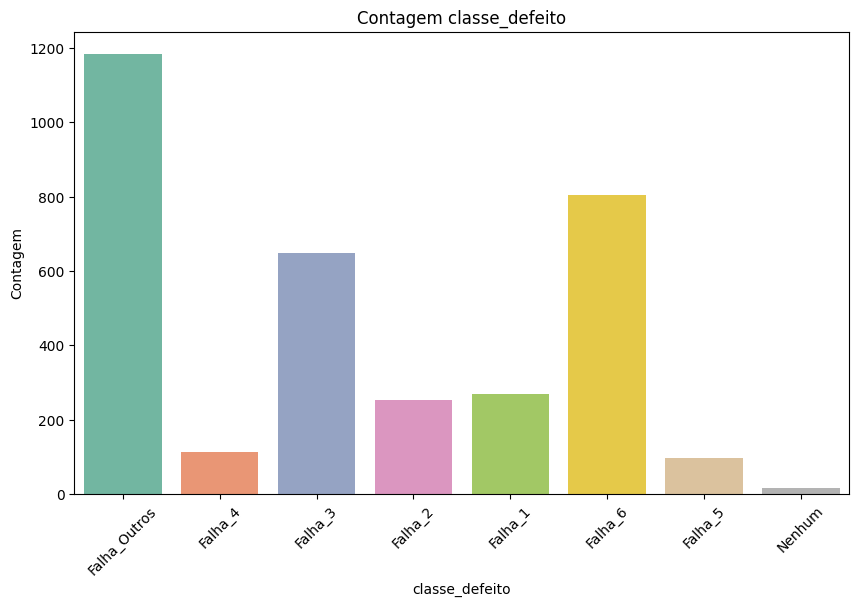

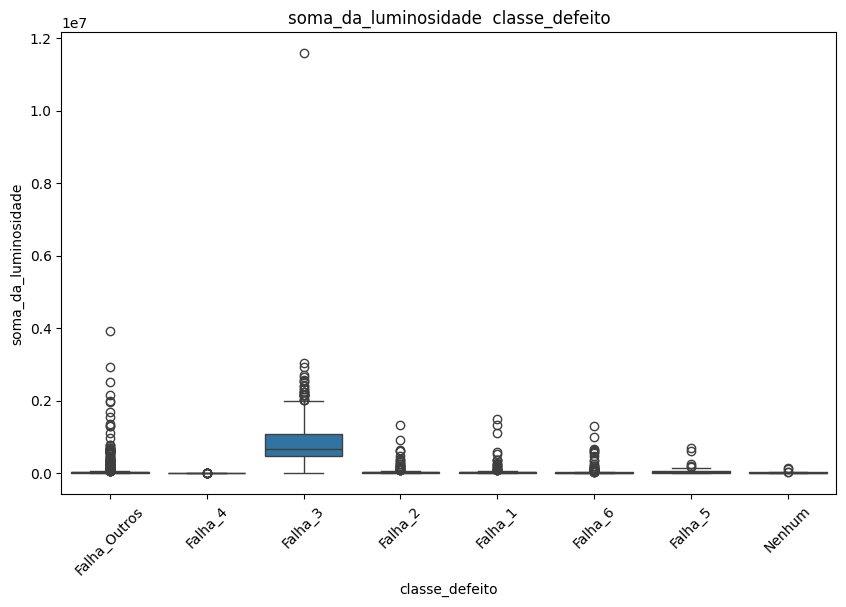

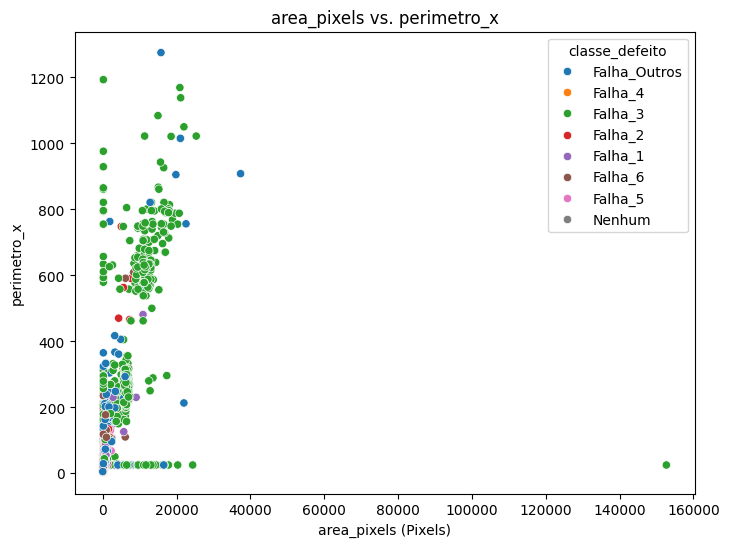

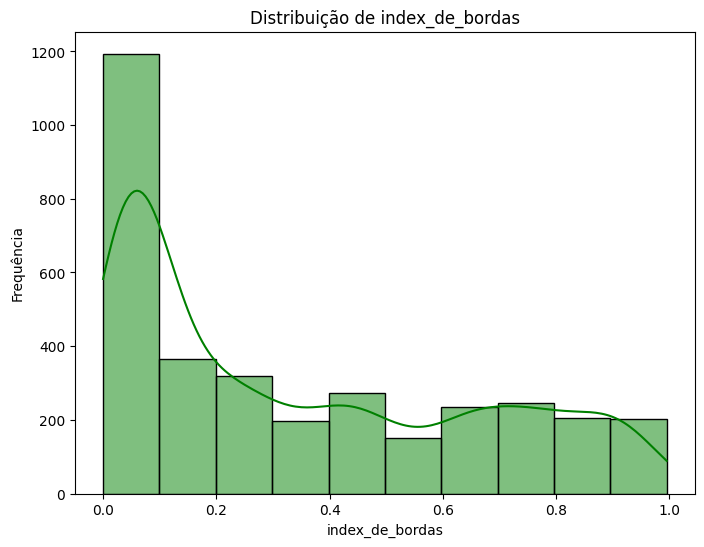

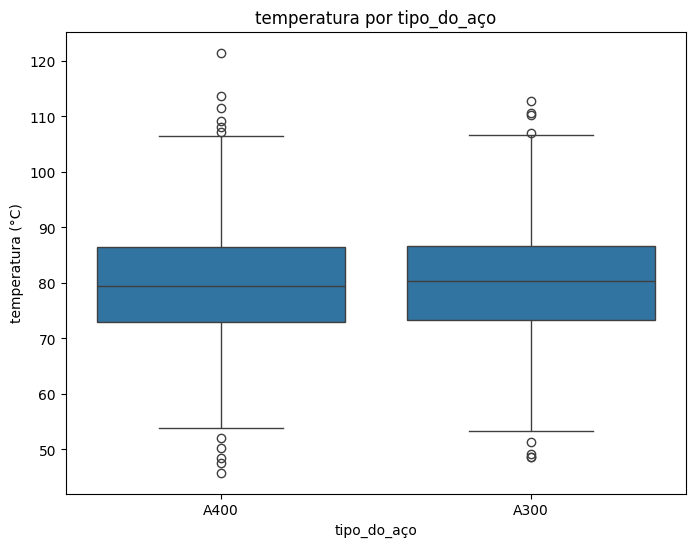

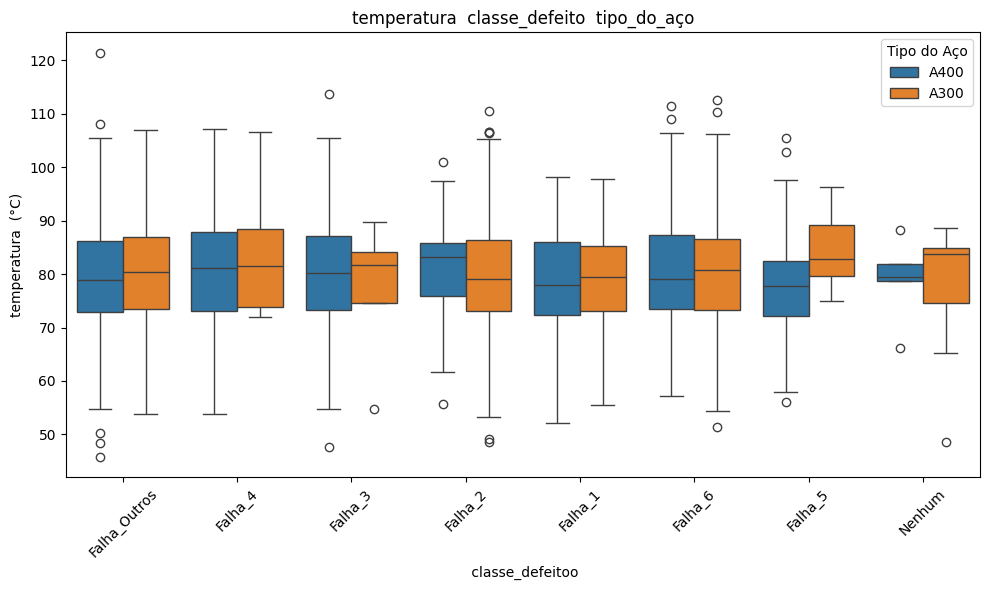

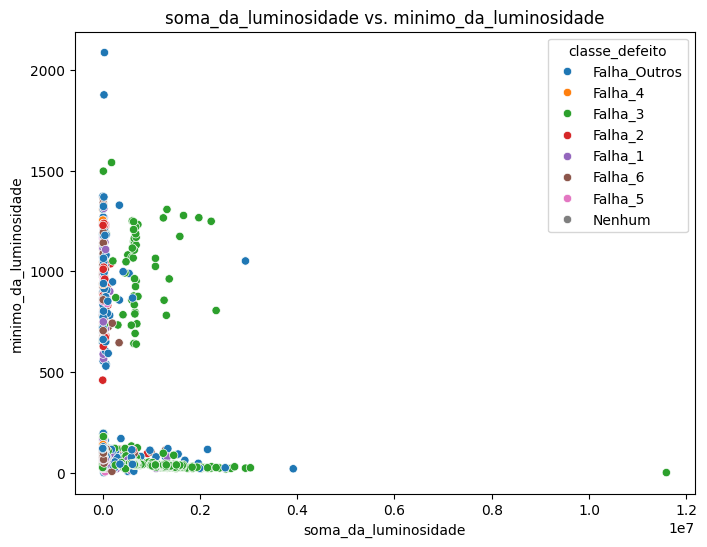

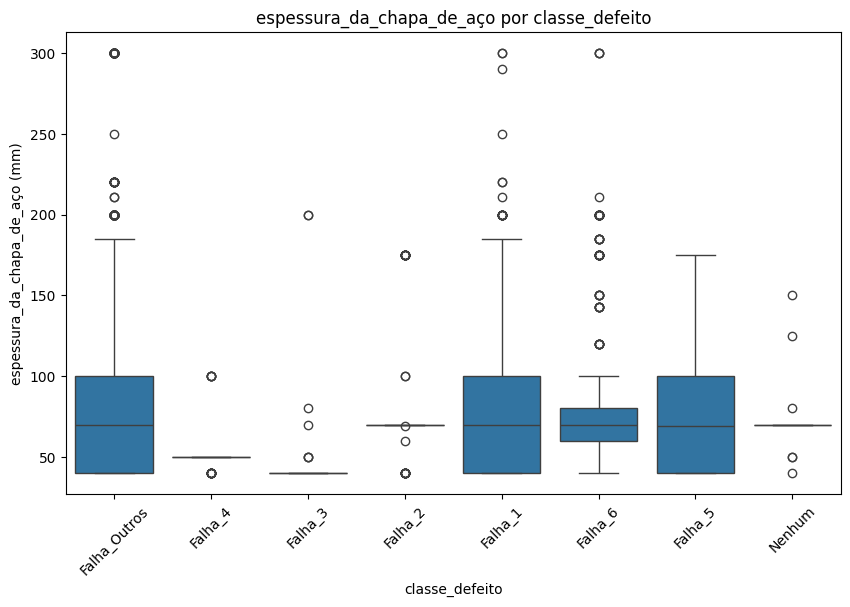

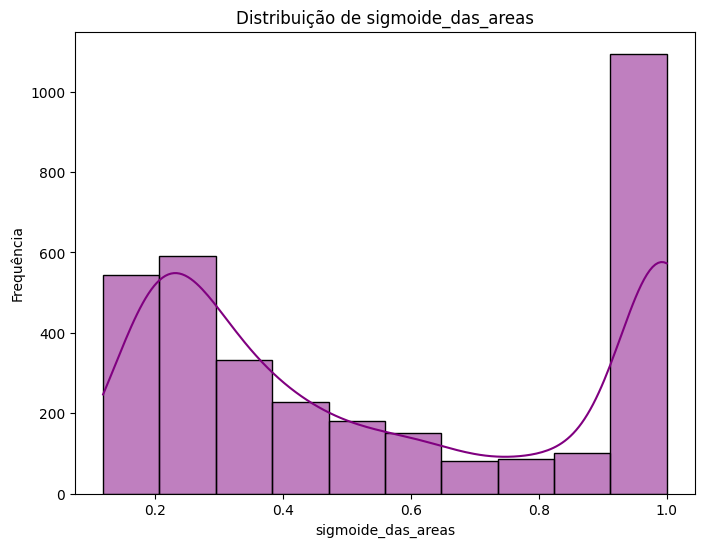

In [39]:
dfTmp = df.copy()
dfTmp['tipo_do_aço'] = dfTmp['tipo_do_aço_A300'].replace({0: 'A400', 1: 'A300'})
def get_defect_class(row):
    if row['falha_1'] == 1: return 'Falha_1'
    if row['falha_2'] == 1: return 'Falha_2'
    if row['falha_3'] == 1: return 'Falha_3'
    if row['falha_4'] == 1: return 'Falha_4'
    if row['falha_5'] == 1: return 'Falha_5'
    if row['falha_6'] == 1: return 'Falha_6'
    if row['falha_outros'] == 1: return 'Falha_Outros'
    return 'Nenhum'
dfTmp['classe_defeito'] = dfTmp.apply(get_defect_class, axis=1)

#mair parte do defeito e outros sugere falaha no processo de deteccao
plt.figure(figsize=(10, 6))
sns.countplot(x='classe_defeito', data=dfTmp, palette='Set2')
plt.title('Contagem classe_defeito')
plt.xlabel('classe_defeito')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='classe_defeito', y='soma_da_luminosidade', data=dfTmp)
plt.title('soma_da_luminosidade  classe_defeito')
plt.xlabel('classe_defeito')
plt.ylabel('soma_da_luminosidade')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_pixels', y='perimetro_x', hue='classe_defeito', data=dfTmp)
plt.title('area_pixels vs. perimetro_x')
plt.xlabel('area_pixels (Pixels)')
plt.ylabel('perimetro_x')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(dfTmp['index_de_bordas'], bins=10, kde=True, color='green')
plt.title('Distribuição de index_de_bordas')
plt.xlabel('index_de_bordas')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='tipo_do_aço', y='temperatura', data=dfTmp)
plt.title('temperatura por tipo_do_aço')
plt.xlabel('tipo_do_aço')
plt.ylabel('temperatura (°C)')
plt.show()

#se a base tivesse integra uma associao interessante encontrada
plt.figure(figsize=(10, 6))
sns.boxplot(x='classe_defeito', y='temperatura', hue='tipo_do_aço', data=dfTmp)
plt.title('temperatura  classe_defeito  tipo_do_aço')
plt.xlabel(' classe_defeitoo')
plt.ylabel('temperatura  (°C)')
plt.xticks(rotation=45)
plt.legend(title='Tipo do Aço')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='soma_da_luminosidade', y='minimo_da_luminosidade', hue='classe_defeito', data=dfTmp)
plt.title('soma_da_luminosidade vs. minimo_da_luminosidade')
plt.xlabel('soma_da_luminosidade')
plt.ylabel('minimo_da_luminosidade')
plt.show()

#contrapondo com o pesos vemos caroco nessa angu, mas, coluna pesos foi retirada
#so que os defeitos podem ocorrem em determinados pesos de aco em funcao de varios fatores
# isso deveria ser levado a empresa...
plt.figure(figsize=(10, 6))
sns.boxplot(x='classe_defeito', y='espessura_da_chapa_de_aço', data=dfTmp)
plt.title('espessura_da_chapa_de_aço por classe_defeito')
plt.xlabel('classe_defeito')
plt.ylabel('espessura_da_chapa_de_aço (mm)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(dfTmp['sigmoide_das_areas'], bins=10, kde=True, color='purple')
plt.title('Distribuição de sigmoide_das_areas')
plt.xlabel('sigmoide_das_areas')
plt.ylabel('Frequência')
plt.show()

#ignore os deprecated  a maioria  e "will be removed" falta um tempo ainda

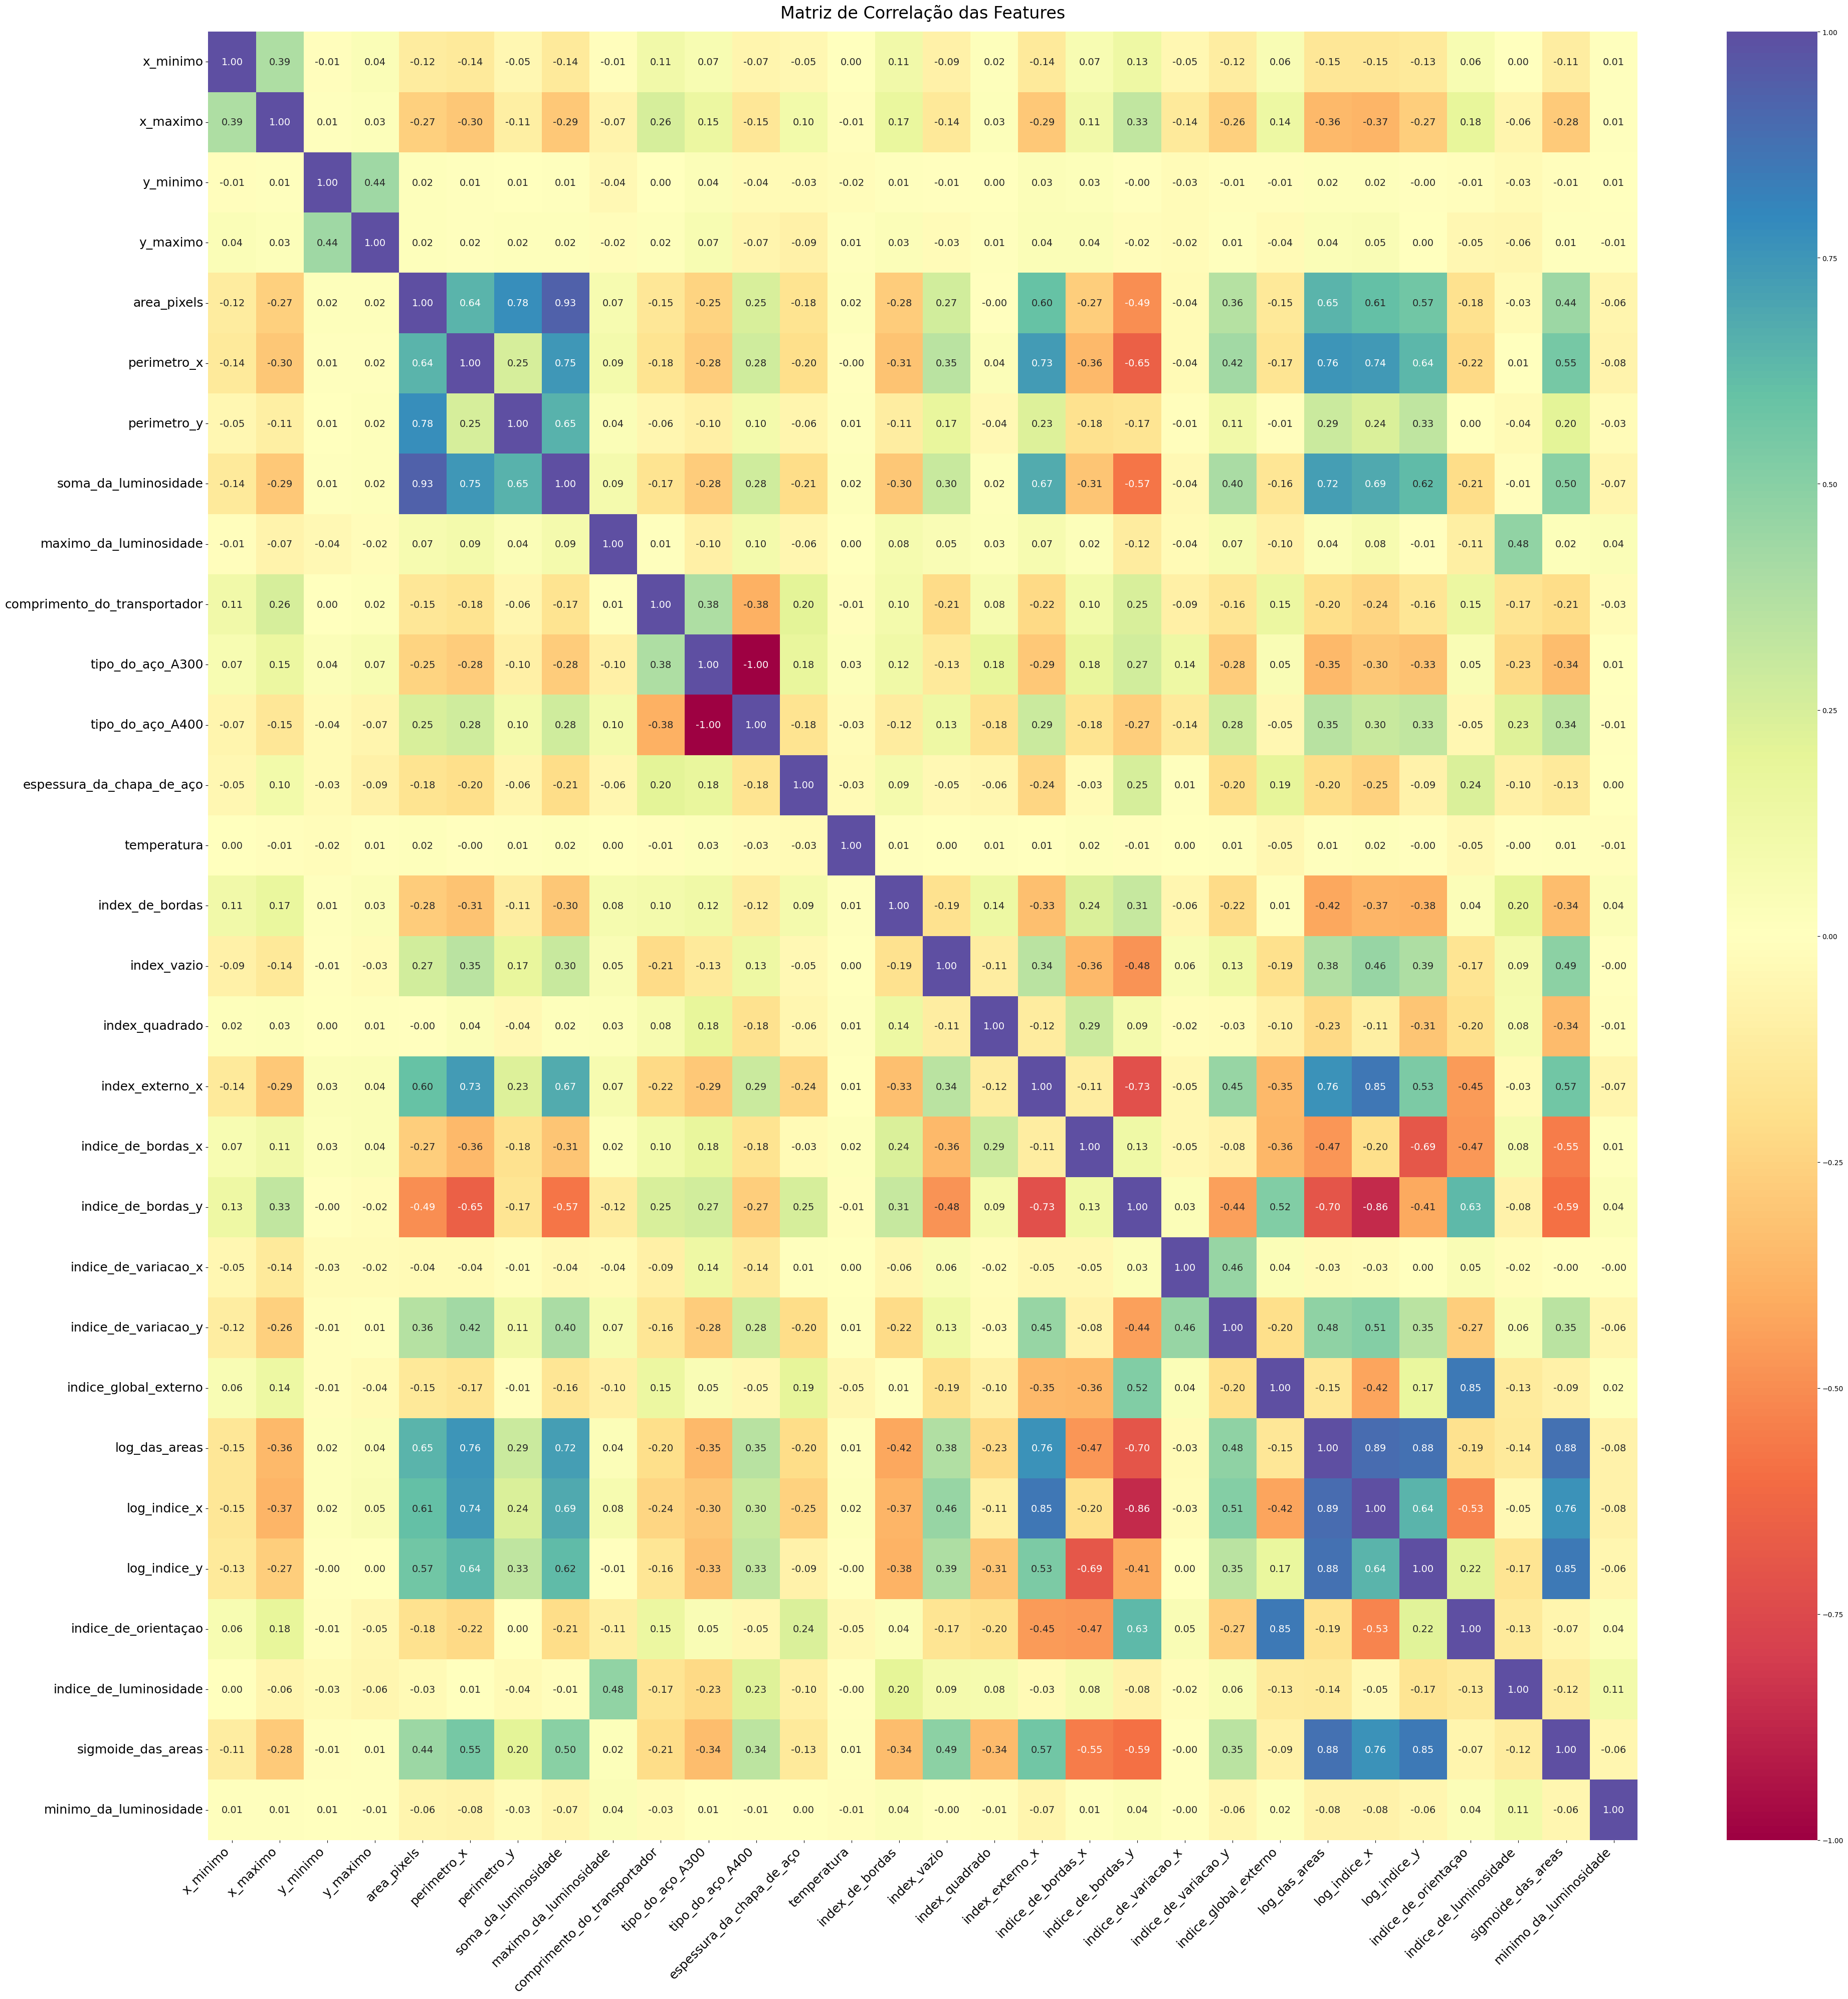

In [40]:
# menos targets
nomeColuna = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
atributos = [col for col in df.columns if col not in ['id'] + nomeColuna]
temporario = df[atributos]
temporarioNum = temporario[temporario.select_dtypes(include=['int64', 'float64']).columns]


#matriz de correlação baseado em Pearson
matriz = temporarioNum.corr(method='pearson')


plt.figure(figsize=(40, 40))
sns.heatmap(matriz, annot=True, cmap='Spectral', fmt='.2f', vmin=-1, vmax=1,
            annot_kws={'size': 14},
            xticklabels=matriz.columns,
            yticklabels=matriz.columns)
plt.title('Matriz de Correlação das Features', fontsize=24, pad=20)
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()



In [41]:
#analisando a matriz com o metodo  pearsom para tirar colunas que nao acrescentam
# muita coisa coisa ao modelo em ML, pois sao muito proximas ou derivadas em
#o nome  bonito e  multicolinearidade


url = "https://www.researchgate.net/profile/Douglas-Serato/publication/250054566/figure/fig2/AS:393231239008259@1470765041391/Figura-3-Tabela-de-classificacao-do-coeficiente-de-Pearson-Fonte-Shimakura-2006.png"
display(Image(url=url))

In [42]:
#Resolvi preservar os tipos de aço A300 e A400, apesar de poder eliminar um dos dois.
df = df.drop(['log_indice_x', 'sigmoide_das_areas', 'indice_de_orientaçao', 'log_indice_y', 'soma_da_luminosidade'], axis=1)


**Dados discrepantes**

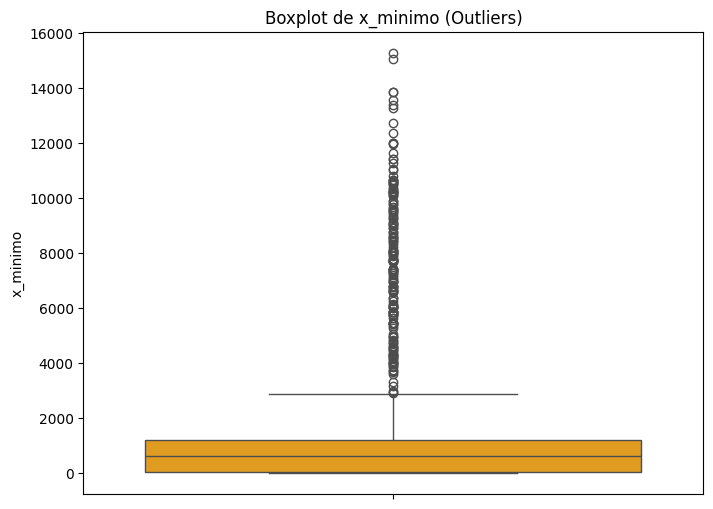

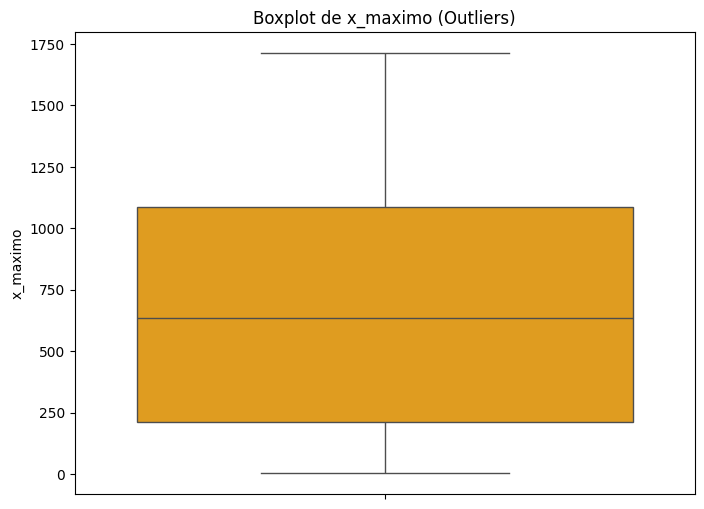

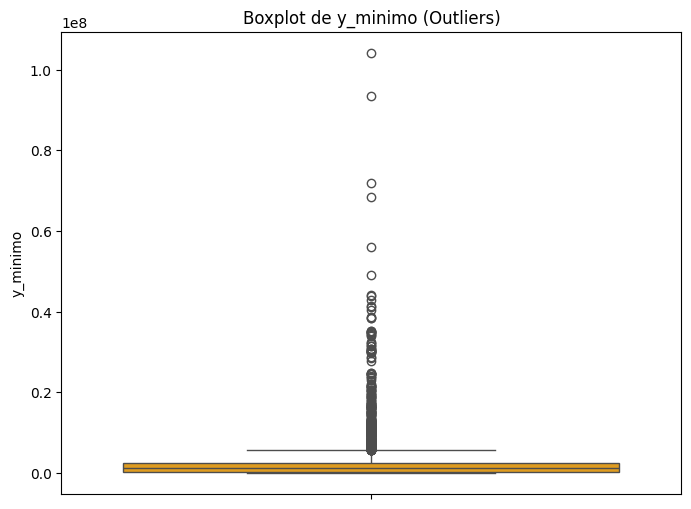

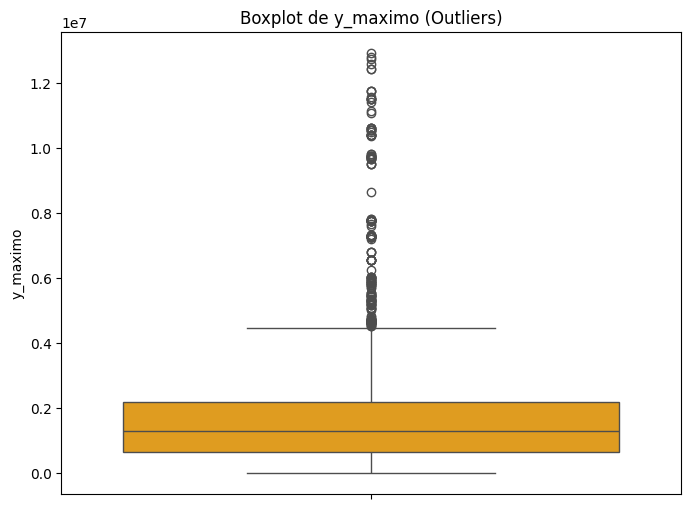

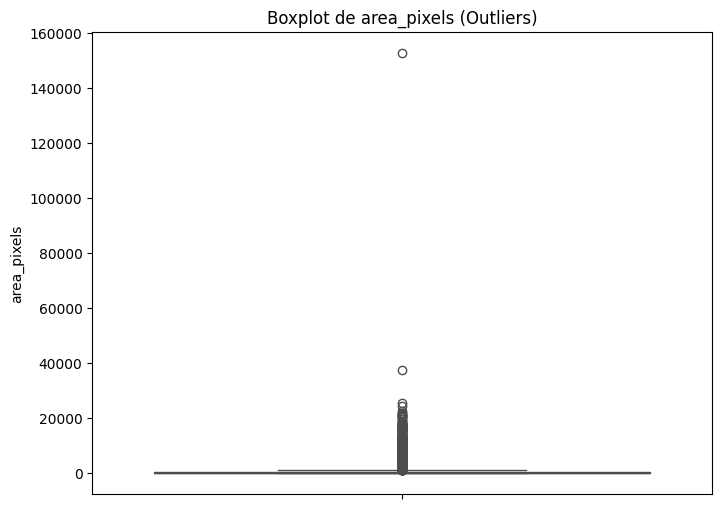

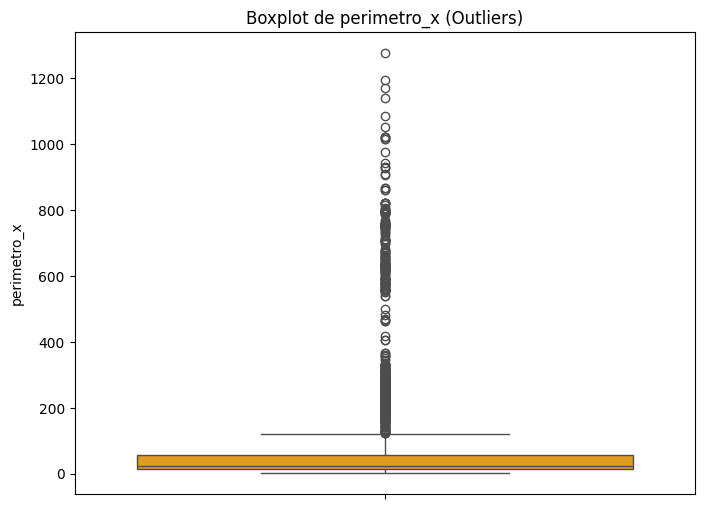

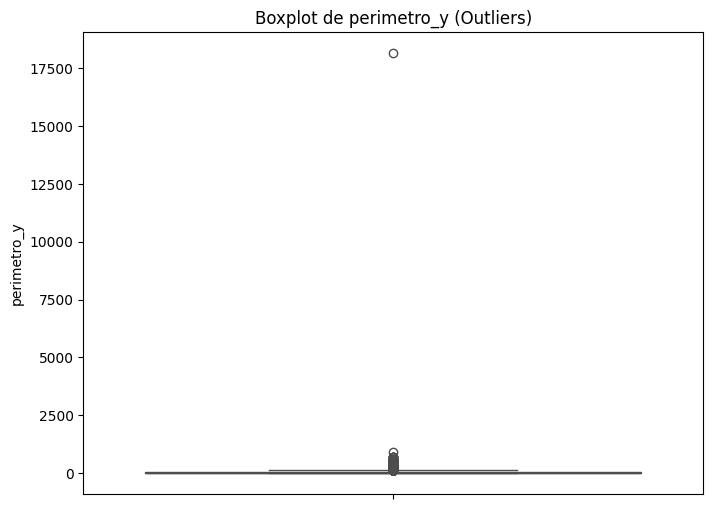

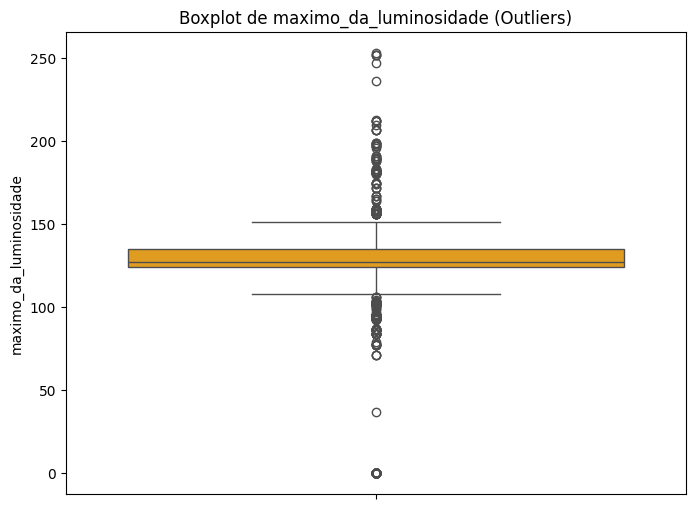

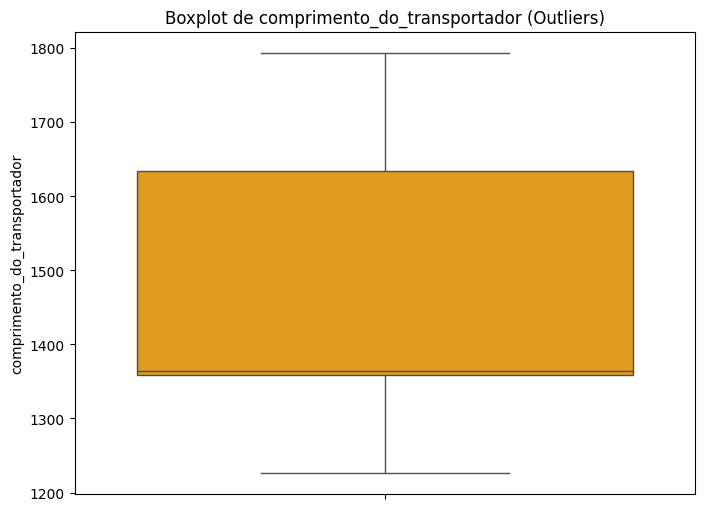

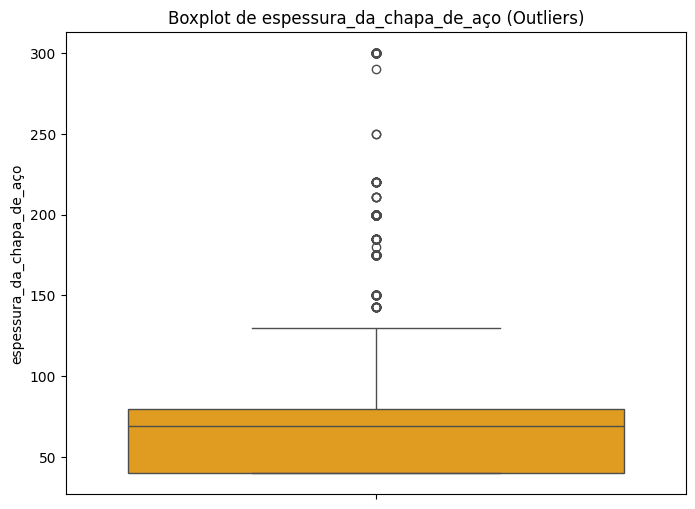

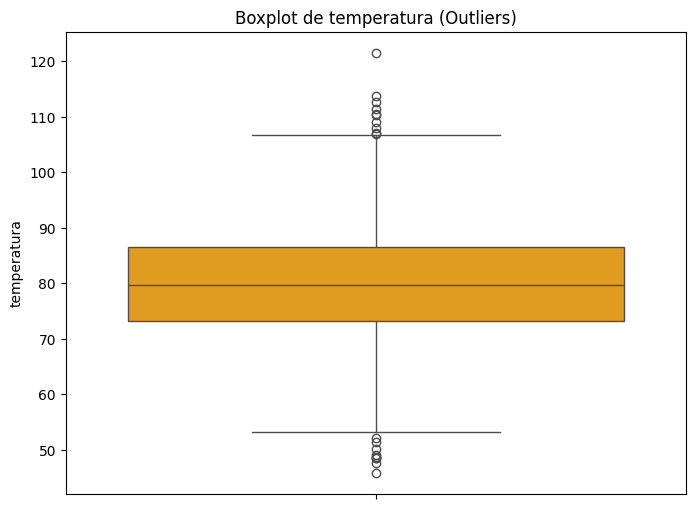

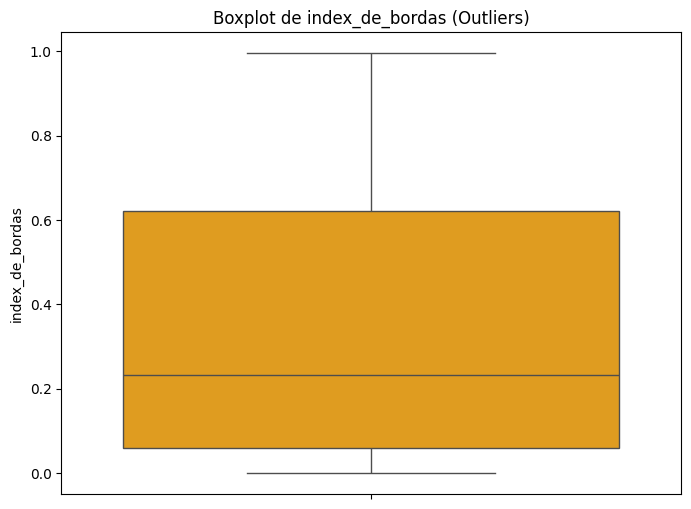

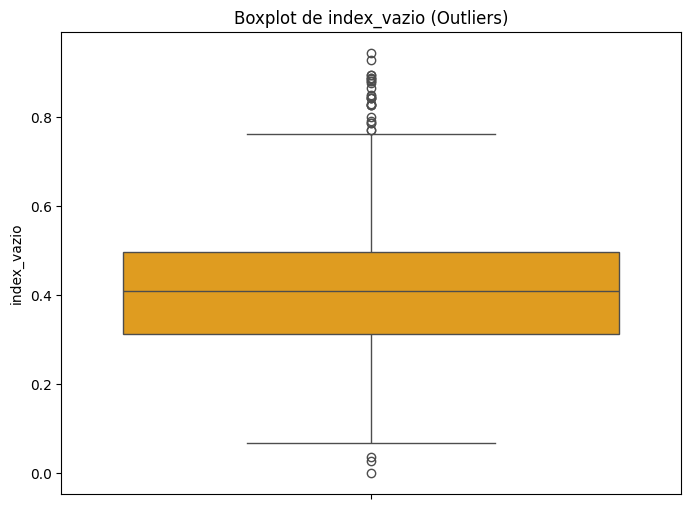

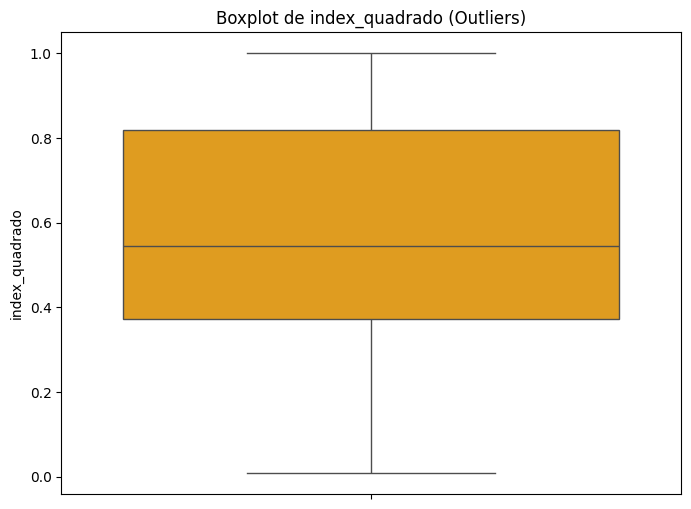

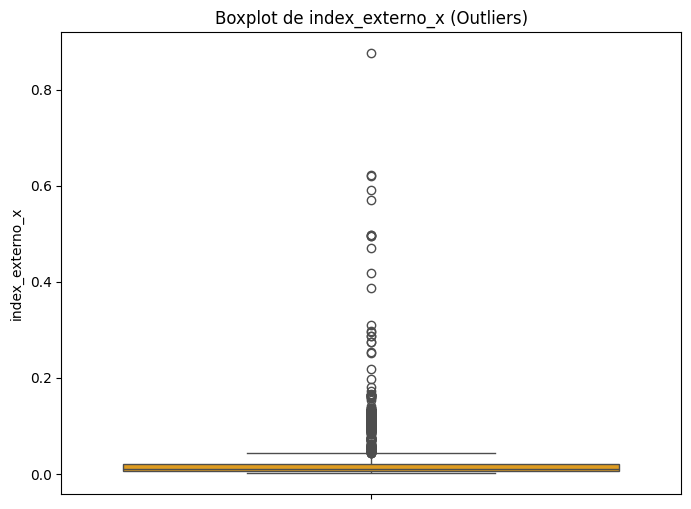

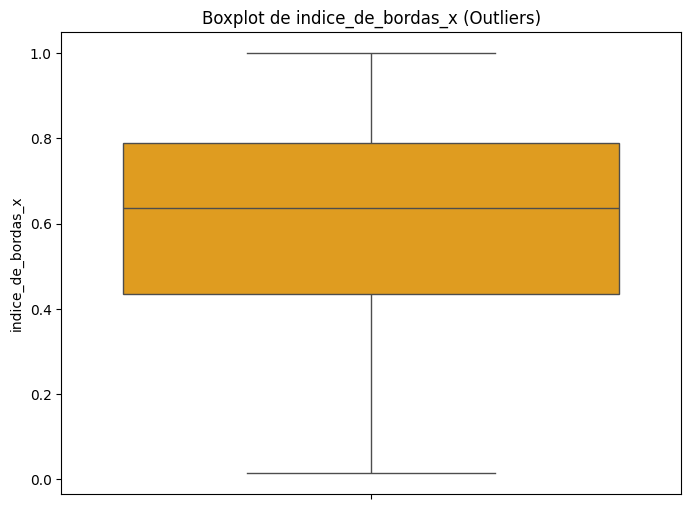

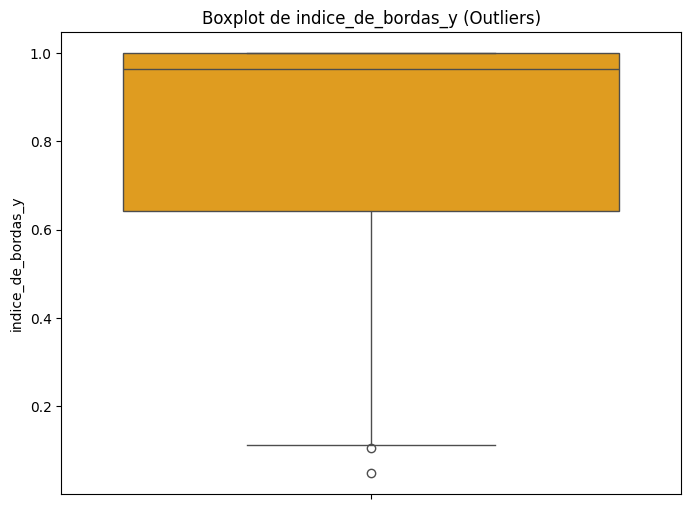

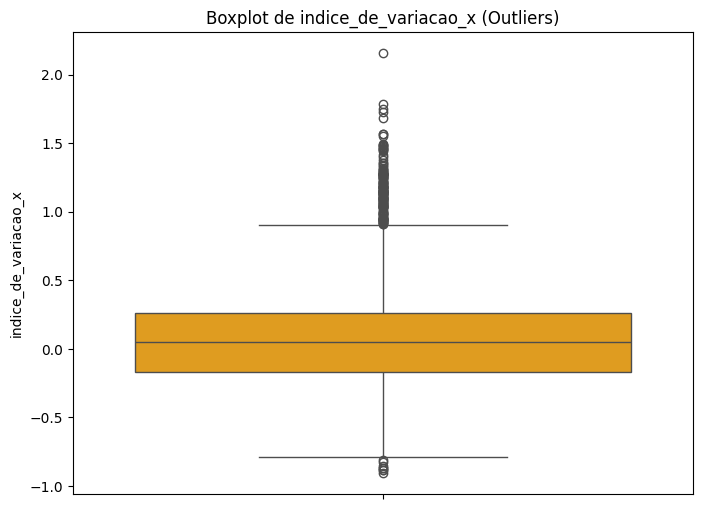

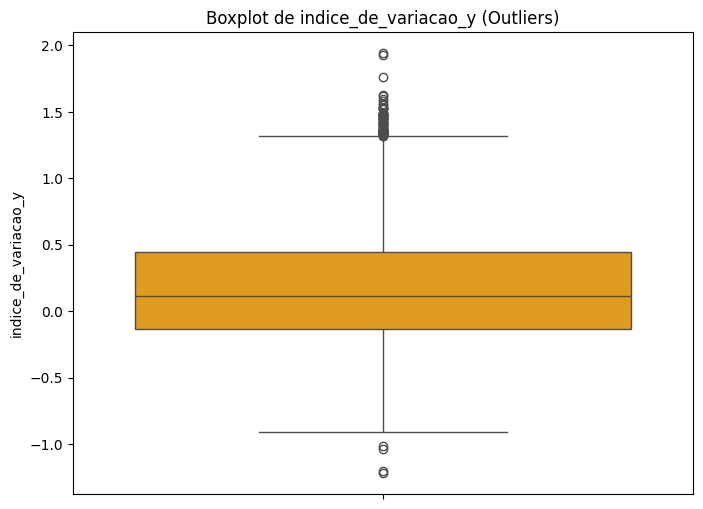

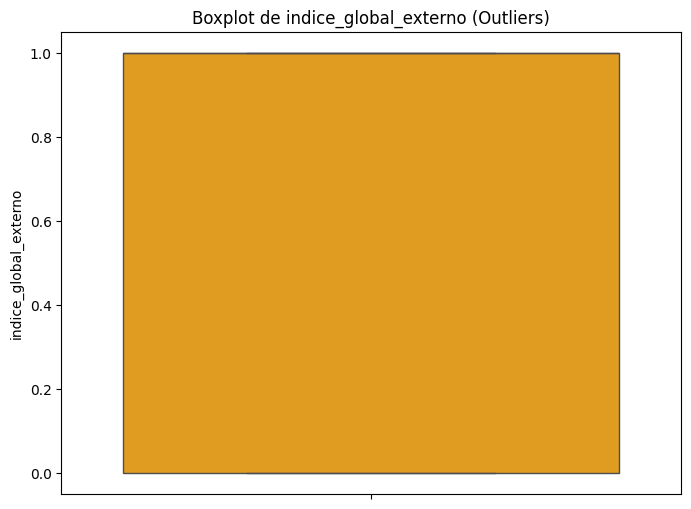

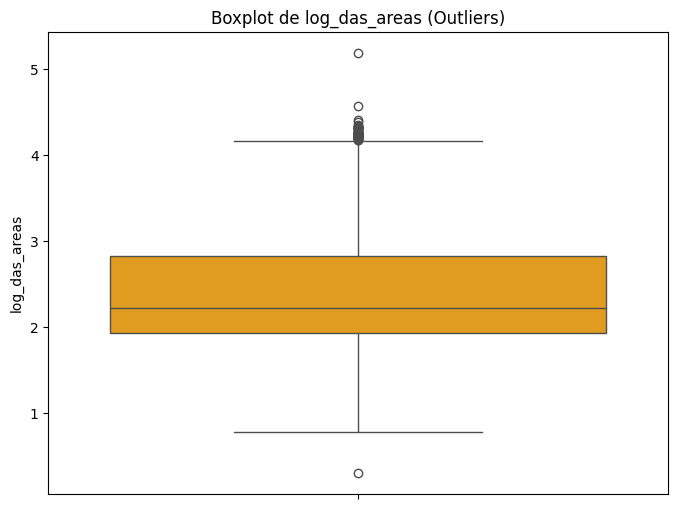

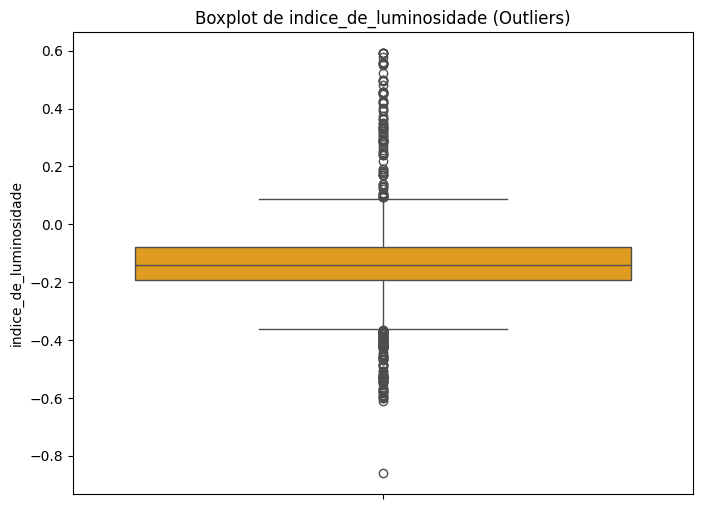

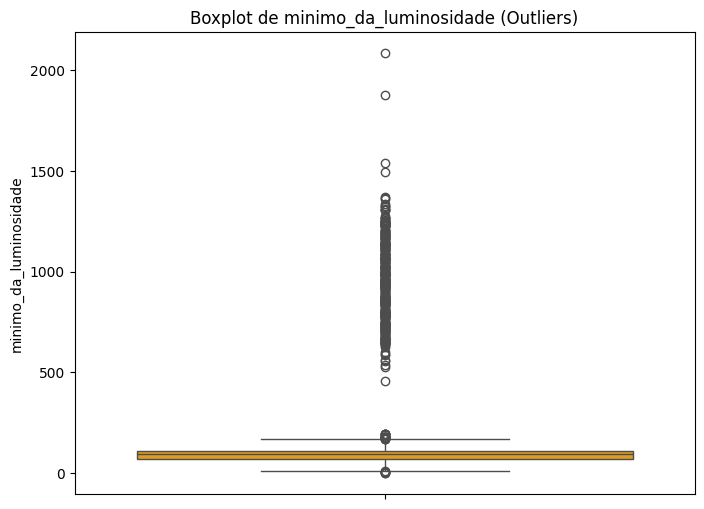

In [43]:
colNum = df.select_dtypes(include=['int64', 'float64']).columns
colNum = [col for col in colNum if col not in ['id', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros', 'tipo_do_aço_A300', 'tipo_do_aço_A400']]

def plot_boxplot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], color='orange')
    plt.title(f'Boxplot de {column} (Outliers)')
    plt.ylabel(column)
    plt.show()

for column in colNum:
    plot_boxplot(column)

Código abaixo é para refinar o modelo, deleta e mantém os dados discrepantes, assim valida com as métricas. **A análise mostra que, se remover o outlier, o modelo fica menor, as métricas diminuem indicando piora no modelo**.

Ademais, a quantidade de outlier em um processo muito bem controlado mostra a necessidade de uma inspeção nos sensores e software, pois eles podem estar gerando informações imprecisas.

Após a checagem de tudo no processo fabril e no sistema de registro dos defeitos e uma base maior, uns 5000k de registros, muito provavelmente os outliers seriam mínimos.

<font color="red" >Logo, é necessário manter os dados discrepantes, pois eles são a prova cabal de que algo está errado no processo, e tirá-los, como dito acima, prejudica o modelo prejudicar o modelo></font>

In [44]:
removerOutliers = False  # true remove false mantem
print("Dados discrepantes\n")
colunasIgnorar = ['tipo_do_aço_A300', 'tipo_do_aço_A400', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

dfNumerico = df.select_dtypes(include=['int64', 'float64']).drop(columns=colunasIgnorar, errors='ignore')

quartil1 = dfNumerico.quantile(0.25)
quartil3 = dfNumerico.quantile(0.75)
iqr = quartil3 - quartil1

limiteInferior = quartil1 - 1.5 * iqr
limiteSuperior = quartil3 + 1.5 * iqr

outliers = (dfNumerico < limiteInferior) | (dfNumerico > limiteSuperior)

resumoOutliers = pd.DataFrame({
    'Outliers': outliers.sum(),
    'Total Linhas': len(df),
    'Percentual': (outliers.sum() / len(df) * 100).round(2)
}).sort_values('Outliers', ascending=False)

print(resumoOutliers.to_string())

# Remoção de outliers se configurado
if removerOutliers:
    linhas_antes = len(df)
    mascara = ~outliers.any(axis=1)
    df = df[mascara].reset_index(drop=True)
    linhas_depois = len(df)
    print(f"\n{linhas_antes - linhas_depois} linhas deletadas")
else:
    print("\n100% original nada removido")



Dados discrepantes

                              Outliers  Total Linhas  Percentual
index_externo_x                    650          3389       19.18
area_pixels                        641          3389       18.91
perimetro_x                        631          3389       18.62
perimetro_y                        545          3389       16.08
maximo_da_luminosidade             386          3389       11.39
minimo_da_luminosidade             364          3389       10.74
espessura_da_chapa_de_aço          336          3389        9.91
y_minimo                           335          3389        9.88
indice_de_luminosidade             221          3389        6.52
x_minimo                           185          3389        5.46
y_maximo                           184          3389        5.43
indice_de_variacao_x               150          3389        4.43
indice_de_variacao_y                75          3389        2.21
log_das_areas                       60          3389        1.77
index

##5-Treinamento dos classificadores

O tipo de problema que a empresa deseja solucionar pela comanda do problema é um problema de classificação, pois a empresa espera **"Desenvolver um sistema eficiente para classificação automática de defeitos, fornecendo informações acionáveis para melhorar o controle de qualidade no processo de produção de chapas de aço"**, ou seja, solicita uma previsão (regressão linear não se aplica e muito menos clusterização). Ademais, o conjunto da base de dados sugere que é necessária uma análise de métricas para validar a precisão do modelo. Além disso, temos um conjunto de classes com valores predefinidos.

Desde modo, algoritmos de regressão linear e clusterização estão inicialmente excluídos em função da disposição da base de dados e da solicitação da empresa, muito embora possa ser possível sua utilização em algum momento para complementar a análise ou mesmo recompor dados faltantes. Todavia, esses muito provavelmente são derivados de erros de sensores ou batizado do professor na base (introdução de ruído), mas, pelo conjunto da solicitação e dos dados fornecidos preliminarmente, eles estão excluídos, pois temos um problema de classificação.

Esse problema de classificação é multiclasse, pois temos ***Rótulos: 7 classes de defeitos (6 categorias específicas + "outros defeitos")***, que são classes *target*.

**Divisão em conjuntos de treinamento e teste.**

In [45]:
if not a1:
    dfIntacto = df.copy()
    a1 = True

#print(df.columns.tolist())
df['classe_defeito'] = 'Nenhum'
df.loc[df['falha_1'] == 1, 'classe_defeito'] = 'Falha_1'
df.loc[df['falha_2'] == 1, 'classe_defeito'] = 'Falha_2'
df.loc[df['falha_3'] == 1, 'classe_defeito'] = 'Falha_3'
df.loc[df['falha_4'] == 1, 'classe_defeito'] = 'Falha_4'
df.loc[df['falha_5'] == 1, 'classe_defeito'] = 'Falha_5'
df.loc[df['falha_6'] == 1, 'classe_defeito'] = 'Falha_6'
df.loc[df['falha_outros'] == 1, 'classe_defeito'] = 'Falha_Outros'


y = df['classe_defeito'].copy()
df.drop(['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros', 'classe_defeito'], axis=1, inplace=True)
display(df.head())


X = df.values
#Dividir os dados em treino (75%) e teste (25%).
#Utilizei test_size=0.25, pois uma base maior melhora o treinamento,
#mas o Google Colab pode free costuma da pau se for muito grande,
#especialmente se técnicas como validação cruzada forem usadas ou se for investido em alguma clusterização
#Defini random_state=42 para garantir reprodutibilidade, já que 42 é o "segredo para tudo" (https://www.youtube.com/watch?v=Ea18uwYZWOg).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,maximo_da_luminosidade,comprimento_do_transportador,tipo_do_aço_A300,...,index_quadrado,index_externo_x,indice_de_bordas_x,indice_de_bordas_y,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,indice_de_luminosidade,minimo_da_luminosidade
0,154,169,260124,260136,75,27,17,143,1364,0,...,0.8000,0.0110,0.5556,0.7059,0.149014,0.149014,0.0,1.8751,0.0362,125
1,1121,634,1789332,1789337,168,9,24,150,1364,0,...,0.7143,0.0052,0.7778,0.8333,-0.041479,-0.041479,0.0,1.2305,0.0294,115
2,41,216,2708878,2708939,6298,275,134,126,1358,0,...,0.3486,0.1289,0.6364,0.4552,-0.089962,-0.054972,0.0,3.7992,-0.1879,42
3,129,157,86408,86427,276,39,26,135,1362,0,...,0.6786,0.0206,0.7179,0.7308,0.254686,0.451035,0.0,2.4409,-0.0416,115
4,436,442,4959398,530985,63,17,17,116,1356,1,...,0.3529,0.0044,0.3529,1.0000,0.929754,-0.070246,1.0,1.7993,-0.2096,90


In [46]:
#nada de mais padroa de ML

results = []

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_predKnn = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predKnn)
precision = precision_score(y_test, y_predKnn, average='weighted', zero_division=0)
recall = recall_score(y_test, y_predKnn, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predKnn, average='weighted', zero_division=0)
results.append(["KNN", accuracy, precision, recall, f1])

# Support Vector Machine (SVM)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_predSvm = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predSvm)
precision = precision_score(y_test, y_predSvm, average='weighted', zero_division=0)
recall = recall_score(y_test, y_predSvm, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predSvm, average='weighted', zero_division=0)
results.append(["SVM", accuracy, precision, recall, f1])

# Árvore de Decisão
ad = DecisionTreeClassifier()
ad.fit(X_train_scaled, y_train)
y_predAd = ad.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predAd)
precision = precision_score(y_test, y_predAd, average='weighted', zero_division=0)
recall = recall_score(y_test, y_predAd, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predAd, average='weighted', zero_division=0)
results.append(["Árvore de Decisão", accuracy, precision, recall, f1])

# Floresta Aleatória
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_predRf = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predRf)
precision = precision_score(y_test, y_predRf, average='weighted', zero_division=0)
recall = recall_score(y_test, y_predRf, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predRf, average='weighted', zero_division=0)
results.append(["Floresta Aleatória", accuracy, precision, recall, f1])



# Regressão Logística
rl = LogisticRegression()
rl.fit(X_train_scaled, y_train)
y_predRl = rl.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predRl)
precision = precision_score(y_test, y_predRl, average='weighted', zero_division=0)
recall = recall_score(y_test, y_predRl, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predRl, average='weighted', zero_division=0)
results.append(["Regressão Logística", accuracy, precision, recall, f1])


# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_predNb = nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predNb)
precision = precision_score(y_test, y_predNb, average='weighted', zero_division=0)
recall = recall_score(y_test, y_predNb, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predNb, average='weighted', zero_division=0)
results.append(["Naive Bayes", accuracy, precision, recall, f1])

# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
y_predAda = ada.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predAda)
precision = precision_score(y_test, y_predAda, average='weighted', zero_division=0)
recall = recall_score(y_test, y_predAda, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predAda, average='weighted', zero_division=0)
results.append(["AdaBoost", accuracy, precision, recall, f1])

df_resultsF = pd.DataFrame(results, columns=["Classificador", "Acurácia", "Precisão", "Recall", "F1-Score"])

# Exibindo os resultados
df_resultsF

,Classificador,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.584906,0.587348,0.584906,0.584557
1,SVM,0.660377,0.682522,0.660377,0.632082
2,Árvore de Decisão,0.582547,0.593328,0.582547,0.586234
3,Floresta Aleatória,0.673349,0.689652,0.673349,0.665791
4,Regressão Logística,0.672170,0.681907,0.672170,0.665354
5,Naive Bayes,0.521226,0.611662,0.521226,0.506888
6,AdaBoost,0.555425,0.552818,0.555425,0.488895


          Acurácia  Precisão    Recall  F1-Score
Acurácia  1.000000  0.858812  1.000000  0.944398
Precisão  0.858812  1.000000  0.858812  0.859278
Recall    1.000000  0.858812  1.000000  0.944398
F1-Score  0.944398  0.859278  0.944398  1.000000


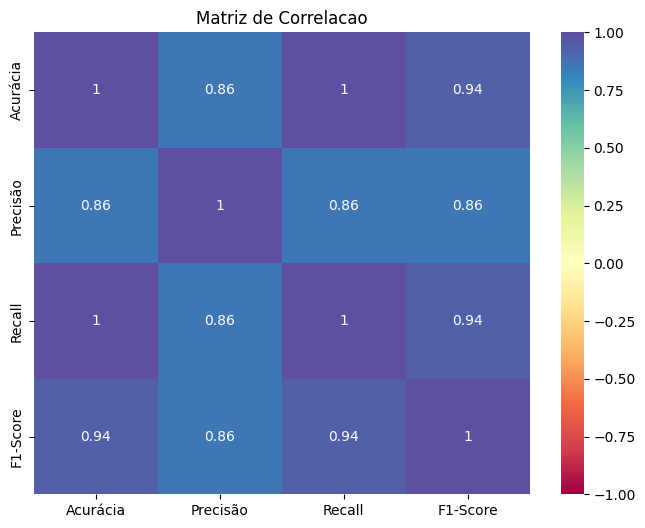

In [47]:
numberos = ["Acurácia", "Precisão", "Recall", "F1-Score"]
matrixC = df_resultsF[numberos].corr()
print(matrixC)
plt.figure(figsize=(8, 6))
sns.heatmap(matrixC, annot=True, cmap='Spectral', vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlacao")
plt.show()

In [48]:
print('\t\tKNN', classification_report(y_test, y_predKnn, zero_division=0))
print('\t\tDecision Tree', classification_report(y_test, y_predAd, zero_division=0))
print('\t\tNaive Bayes', classification_report(y_test, y_predNb, zero_division=0))
print('\t\tLogistic Regression', classification_report(y_test, y_predRl, zero_division=0))
print('\t\tAdaBoost\n', classification_report(y_test, y_predAda, zero_division=0))
print('\t\tRandom Forest', classification_report(y_test, y_predRf, zero_division=0))
print('\t\tSVM', classification_report(y_test, y_predSvm, zero_division=0))


		KNN               precision    recall  f1-score   support

     Falha_1       0.21      0.19      0.20        63
     Falha_2       0.79      0.69      0.73        64
     Falha_3       0.95      0.95      0.95       174
     Falha_4       0.77      0.68      0.72        25
     Falha_5       0.50      0.30      0.38        30
     Falha_6       0.44      0.48      0.46       218
Falha_Outros       0.51      0.53      0.52       272
      Nenhum       0.00      0.00      0.00         2

    accuracy                           0.58       848
   macro avg       0.52      0.48      0.50       848
weighted avg       0.59      0.58      0.58       848

		Decision Tree               precision    recall  f1-score   support

     Falha_1       0.22      0.25      0.24        63
     Falha_2       0.91      0.75      0.82        64
     Falha_3       0.94      0.91      0.93       174
     Falha_4       0.62      0.72      0.67        25
     Falha_5       0.55      0.40      0.46        30
  

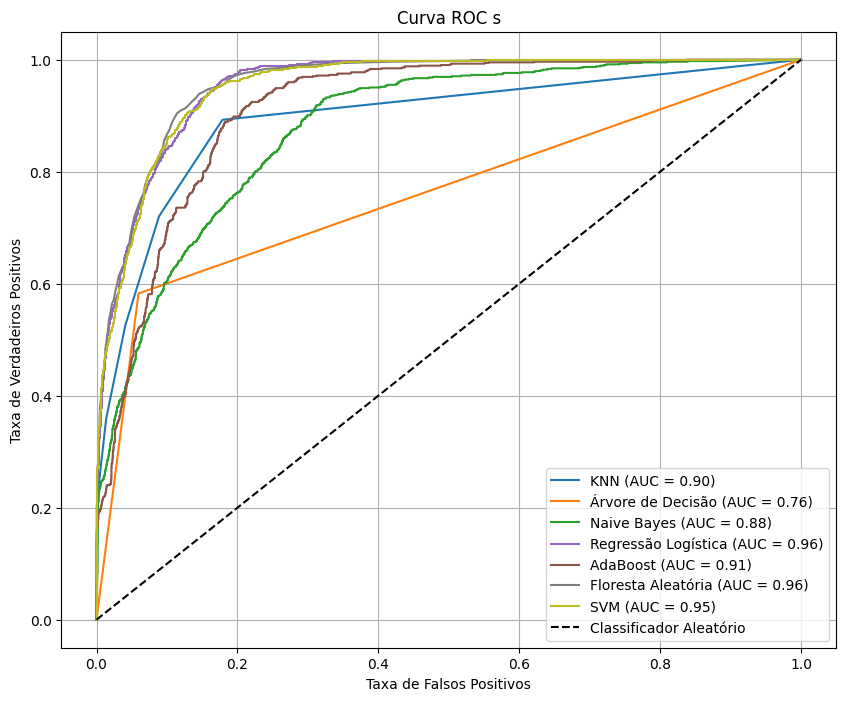

In [49]:


# Configuração dos classificadores e dados
classificadores = {
    "KNN": knn,
    "Árvore de Decisão": ad,
    "Naive Bayes": nb,
    "Regressão Logística": rl,
    "AdaBoost": ada,
    "Floresta Aleatória": rf,
    "SVM": svm
}

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)



plt.figure(figsize=(10, 8))


for i, (nome, modelo) in enumerate(classificadores.items()):
    try:

        y_proba = modelo.predict_proba(X_test_scaled)


        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)


        plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})', color=plt.cm.tab10(i/7))
    except AttributeError:
        print(f"Modelo {nome} nao suporta predict_proba .")


plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')


plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC s')
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

# **Objetivos Fundamentais em Função dos Documentos de Requisitos**

**1** <font color="red"> Objetivo :  </font> ` O sistema deverá ser capaz de, a partir do cadastro de uma nova imagem (ou conjunto demedições), `**<font color="blue"> prever a classe do defeito e retornar a probabilidade associada.</font>**





In [50]:
df_test = pd.DataFrame(X_test)
df_test['Classe_Real'] = y_test.values
df_test.reset_index(inplace=True)
registro_widget = widgets.Dropdown(
    options=df_test.index.tolist(),
    description='Linha:',
    disabled=False
)

modelo_widget = widgets.Dropdown(
    options=['KNN', 'SVM', 'Árvore de Decisão', 'Floresta Aleatória',
             'Regressão Logística', 'Naive Bayes', 'AdaBoost'],
    description='Modelo:',
    disabled=False
)

output = widgets.Output()

def mostrar_resultados(change):
    with output:
        output.clear_output()

        idx = registro_widget.value
        linha_teste = X_test.iloc[idx] if hasattr(X_test, 'iloc') else X_test[idx]
        classe_real = y_test.iloc[idx]


        modelo_nome = modelo_widget.value
        modelo = {
            'KNN': knn,
            'SVM': svm,
            'Árvore de Decisão': ad,
            'Floresta Aleatória': rf,
            'Regressão Logística': rl,
            'Naive Bayes': nb,
            'AdaBoost': ada
        }[modelo_nome]

        # calcular probabilidades
        linha_teste_reshaped = linha_teste.values.reshape(1, -1) if hasattr(linha_teste, 'values') else linha_teste.reshape(1, -1)
        linha_teste_scaled = scaler.transform(linha_teste_reshaped)
        probas = modelo.predict_proba(linha_teste_scaled)[0]
        classes = modelo.classes_


        resultados = pd.DataFrame({
            'Classe': classes,
            '%': [p*100 for p in probas]
        }).sort_values('%', ascending=False)


        print(f"\nLinha selecionada: {idx}")
        print(f"Classe real: {classe_real}")
        print(f"\nresultado {modelo_nome}:")
        display(resultados.style.format({'%': '{:.2f}%'}))

        classe_predita = modelo.predict(linha_teste_scaled)[0]
        print(f"\nClasse predita: {classe_predita}")

registro_widget.observe(mostrar_resultados, names='value')
modelo_widget.observe(mostrar_resultados, names='value')
btn_aleatorio = widgets.Button(
    description="aleatória",
    button_style='info',
    tooltip='linha aleatória'
)

def on_btn_click(b):
    random_idx = np.random.randint(0, len(X_test))
    registro_widget.value = random_idx

btn_aleatorio.on_click(on_btn_click)


ui = widgets.VBox([
    widgets.HBox([registro_widget, btn_aleatorio]),
    modelo_widget,
    output
])

display(ui)
mostrar_resultados(None)

**2** <font color="red"> Objetivo :  </font> ```Além disso, a empresa espera que você extraia insights da operação e dos defeitos e gere visualizações de
dados.```


In [55]:
df.head()

,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,maximo_da_luminosidade,comprimento_do_transportador,tipo_do_aço_A300,...,index_quadrado,index_externo_x,indice_de_bordas_x,indice_de_bordas_y,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,indice_de_luminosidade,minimo_da_luminosidade
0,154,169,260124,260136,75,27,17,143,1364,0,...,0.8000,0.0110,0.5556,0.7059,0.149014,0.149014,0.0,1.8751,0.0362,125
1,1121,634,1789332,1789337,168,9,24,150,1364,0,...,0.7143,0.0052,0.7778,0.8333,-0.041479,-0.041479,0.0,1.2305,0.0294,115
2,41,216,2708878,2708939,6298,275,134,126,1358,0,...,0.3486,0.1289,0.6364,0.4552,-0.089962,-0.054972,0.0,3.7992,-0.1879,42
3,129,157,86408,86427,276,39,26,135,1362,0,...,0.6786,0.0206,0.7179,0.7308,0.254686,0.451035,0.0,2.4409,-0.0416,115
4,436,442,4959398,530985,63,17,17,116,1356,1,...,0.3529,0.0044,0.3529,1.0000,0.929754,-0.070246,1.0,1.7993,-0.2096,90


In [56]:
dfIntacto.head()

,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,maximo_da_luminosidade,comprimento_do_transportador,tipo_do_aço_A300,...,log_das_areas,indice_de_luminosidade,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,154,169,260124,260136,75,27,17,143,1364,0,...,1.8751,0.0362,125,0,0,0,0,0,0,1
1,1121,634,1789332,1789337,168,9,24,150,1364,0,...,1.2305,0.0294,115,0,0,0,1,0,0,0
2,41,216,2708878,2708939,6298,275,134,126,1358,0,...,3.7992,-0.1879,42,0,0,1,0,0,0,0
3,129,157,86408,86427,276,39,26,135,1362,0,...,2.4409,-0.0416,115,0,0,1,0,0,0,0
4,436,442,4959398,530985,63,17,17,116,1356,1,...,1.7993,-0.2096,90,0,1,0,0,0,0,0


In [53]:
print(dfIntacto.columns.tolist())

['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'maximo_da_luminosidade', 'comprimento_do_transportador', 'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço', 'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado', 'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y', 'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo', 'log_das_areas', 'indice_de_luminosidade', 'minimo_da_luminosidade', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']


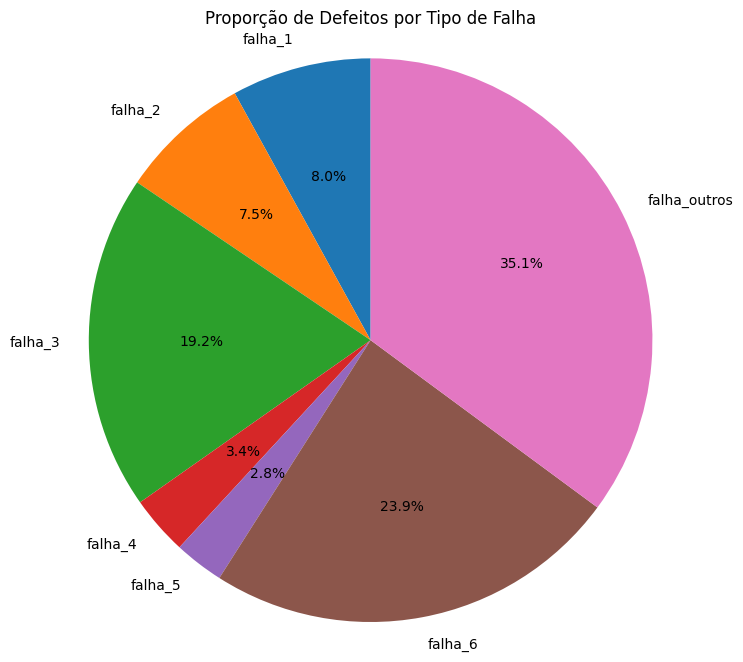

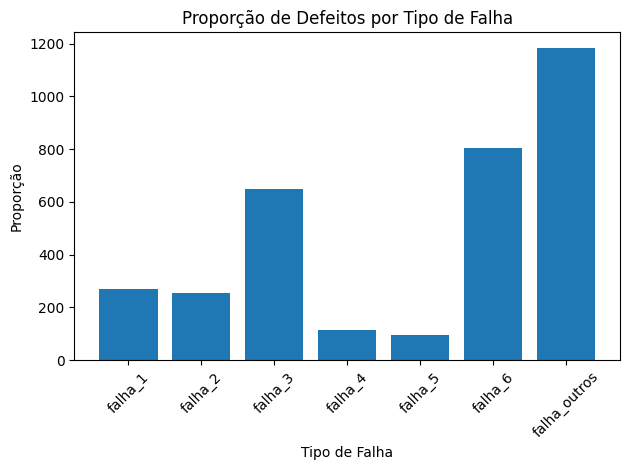

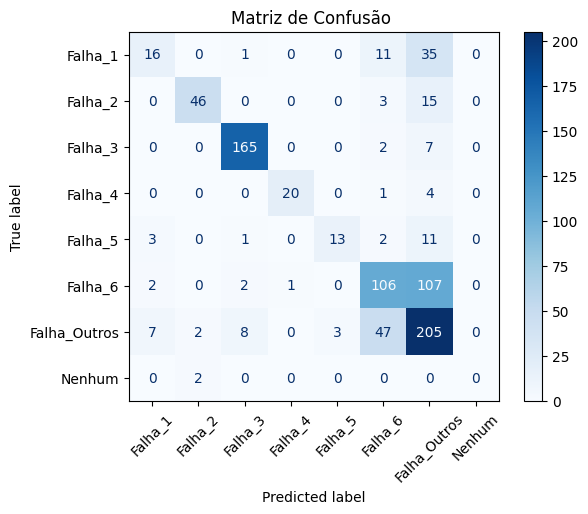

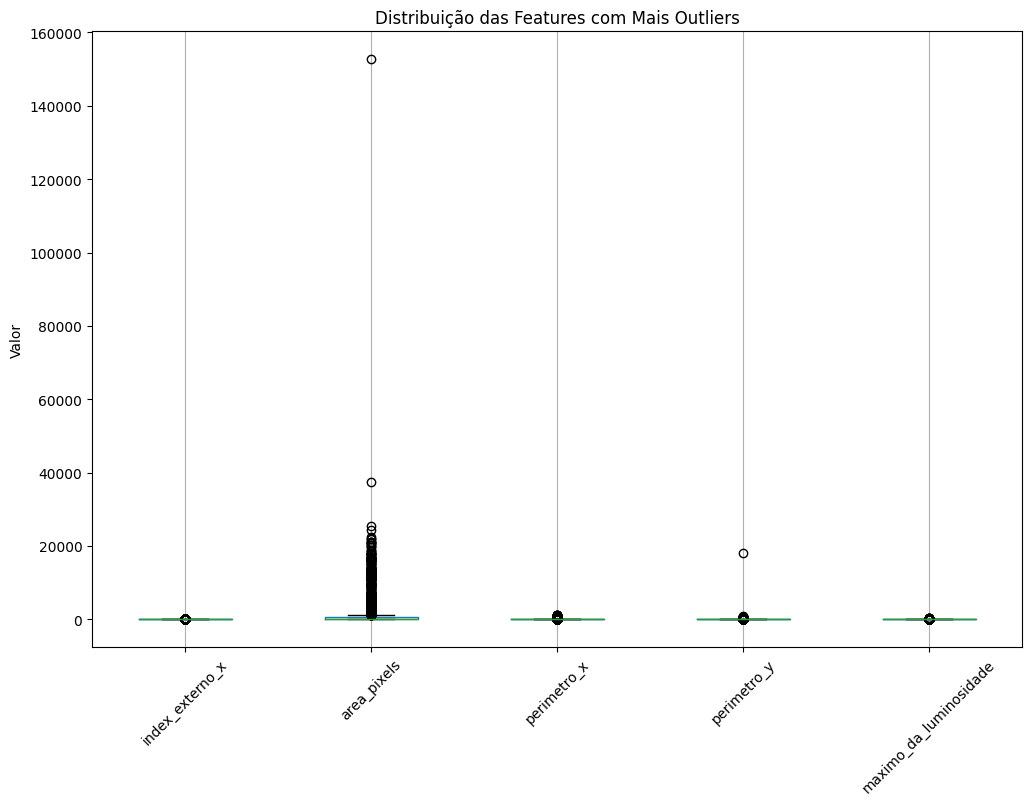

In [54]:
colComFalha = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
proporcoes = dfIntacto[colComFalha].sum()
plt.figure(figsize=(8, 8))
plt.pie(proporcoes, labels=colComFalha, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Defeitos por Tipo de Falha')
plt.axis('equal')
plt.show()



plt.bar(colComFalha, proporcoes)
plt.title('Proporção de Defeitos por Tipo de Falha')
plt.xlabel('Tipo de Falha')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_predRf, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão ')
plt.xticks(rotation=45)
plt.show()


report = classification_report(y_test, y_predRf, output_dict=True, zero_division=0)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])



top_outliers = resumoOutliers.head(5).index
plt.figure(figsize=(12,8))
df[top_outliers].boxplot()
plt.title('Distribuição das Features com Mais Outliers')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
